# Best Decision Tree for Titanic Kaggle competition
### Kaggle Titanic whit simple Decision Tree

**Step**
1. Explore df
2. Missing values and feature engineering
3. Stat Explore
4. Predictive Modeling
5. Submission

##Explore df

### Import lib

In [ ]:
#import drive dir
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install seaborn
!pip install infolib

In [ ]:
# for explore df
import os
import glob
import warnings
warnings.filterwarnings('ignore')
# from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) # set the number of characters visible for each cell of the column
# ex. 50 = first 50 characters
# None = full text
# from matplotlib import pyplot
import matplotlib.pyplot as plt
# import matplotlib.pylab as pltlab
from infolib import info

# for pre-processing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for stat explore
import seaborn as sns
import re
from re import search
from IPython.display import display_html
from itertools import chain, cycle
from scipy import stats
from scipy.stats import anderson
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest

# for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# lLbrary to compute time measures
import time
import datetime

def local_time():
    # dd/mm/YY H:M:S
    print("Start at " + datetime.datetime.now().strftime("%H:%M:%S"))	

local_time()

Start at 07:03:59


### Def

In [ ]:
# per visualizzare più pandas in una cella

def display_side_by_side(*args, titles = cycle([''])):
    html_str = ''
    for df, title in zip(args, chain(titles, cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3>{title}</h3>'
        html_str+=df.to_html().replace('table', 'table style="display:inline"')
        html_str+='</td></th></br></br>'
    display_html(html_str, raw=True)
    return

In [ ]:
# funzione per il calcolo del Chi_Square
# Serve la tabella del Chi_Square per il terzo valore
def chi2_by_hand (df, col1, col2, probability):
    #---crea la tabella delle contingenze--- 
    df_cont = pd.crosstab(index = df[col1], columns = df[col2]) 
    # display(df_cont)
    #---calcola il grado di libertà--- 
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---somma i totali per riga e colonne--- 
    df_cont.loc[:,'Total']= df_cont.sum(axis=1) 
    df_cont.loc['Total']= df_cont.sum() 
    # print( '---Osservato (O)---') 
    # display(df_cont)
    #---crea il dataframe del valore atteso--- 
    df_exp = df_cont.copy()     
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()             
    # print('---Expected (E)---') 
    # display(df_exp) 
        
    # calcola i valori chi-quadrato 
    df_chi2 = ((df_cont - df_exp)**2) / df_exp     
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1) 
    df_chi2.loc['Total']= df_chi2.sum() 
    
    # print('---Chi-Square---') 
    # display(df_chi2 )
    #---get chi- 
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    # p = format(p, '.5f')
    int(degree_f)
    prob = chi_square_table[probability][degree_f-1:degree_f]
    prob = round(float(prob), 3)
    
    return chi_square_score, prob, degree_f, p

In [ ]:
# from scipy.stats import anderson
# from scipy.stats import shapiro
# from statsmodels.graphics.gofplots import qqplot
# from scipy.stats import normaltest

# per visualizzare la distribuzione di variabili continue o discrete o categoriche numerabili
# sarebbe meglio fare una cosa così: def dist_cont(df, type=None, *args):
def dist_cont(df, *args):
  else_1=0

  if isinstance(df, pd.DataFrame)==False:
    print(f"This function expects PandasDataframe argument.\n{type(df)} is not a valid argument")
  else:
    if df.empty==True:
      print(f"Warning! Your PandasDataframe is empty")
    else:

      try:
        for series in df.columns:

          if args:
            for i in args:
              if search(i, df[series].dtype.name): # or search('int', titanic_01[series].dtype.name):
                if i == 'int' or i == 'float':

                  # stat, p = stats.shapiro(titanic_01[series])
                  # # print('Statistics=%.3f, p=%.3f' % (stat, p))
                  # # interpret
                  # alpha = 0.05

                  fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(12,6), gridspec_kw= {"height_ratios": (0.2, 1), "width_ratios":(1,0.7)})
                  # fig.suptitle(f'Is {series} Gaussian?', fontsize=16)
                  gs = axs[0, 1].get_gridspec()
                  # remove the underlying axes
                  for ax in axs[0:, 1]:
                      ax.remove()


                  axbig = fig.add_subplot(gs[0:, 1])

                  plt.subplots_adjust(hspace=0.05)

                  mean=round(df[series].mean(), 2)
                  median=round(df[series].median(), 2)
                  mode=df[series].mode().values[0]

                  ax_box=axs[0, 0]
                  ax_hist=axs[1, 0]

                  sns.boxplot(data=df, x=series, ax=ax_box, color="snow")
                  ax_box.axvline(mean, color='r', linestyle='--', alpha=0.5)
                  ax_box.axvline(median, color='g', linestyle='-', alpha=0.5)
                  ax_box.axvline(mode, color='b', linestyle='-', alpha=0.5)
                  ax_box.set_title(f'Box and hist plot for {series}', fontsize=12)

                  sns.histplot(data=titanic_01, x=series, ax=ax_hist, kde=True, palette="Set3")
                  ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean ({mean})", alpha=0.5)
                  ax_hist.axvline(median, color='g', linestyle='-', label=f"Median ({median})", alpha=0.5)
                  ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode ({mode})", alpha=0.5)
                  xmin, xmax, ymin, ymax = plt.axis()
                  # import pylab
                  # axbig = qqplot(titanic_01['Age'], line='s')


                  stats.probplot(df[series], dist="norm", plot=axbig)
                  axbig.yaxis.tick_right()
                  axbig.yaxis.set_label_position("right")
                  axbig.set_title(f'QQ plot for {series}', fontsize=12)
                  axbig.get_lines()[0].set_marker('.')
                  axbig.get_lines()[0].set_markerfacecolor('dimgray')
                  axbig.get_lines()[0].set_markersize(7.0)

                  # ax.get_lines()[1].set_linewidth(12.0)


                  ax_hist.legend()
                  ax_box.set(xlabel='')
                  fig.tight_layout()
                  # plt.title('Album v. Individual Tracks', fontsize=16)
                  fig.suptitle(f'Is {series} Gaussian?', fontsize=16)
                  gs.tight_layout(fig, rect=[0, 0.03, 1, 0.95]) 
                  plt.show()

                  stat, p = stats.shapiro(df[series])
                  print()
                  print('Shapiro-Wilk Test: statistics=%.3f, p=%.3f' % (stat, p))
                  # interpret
                  alpha = 0.05
                  # normality test
                  if p > alpha:
                    print(f'{series} looks Gaussian (fail to reject H0)')
                  else:
                    print(f'{series} does not look Gaussian (reject H0)')
                  print()

                  stat, p = normaltest(df[series])
                  print('D’Agostino’s K^2 Test: statistics=%.3f, p=%.3f' % (stat, p))
                  # interpret
                  alpha = 0.05
                  if p > alpha:
                    print(f'{series} looks Gaussian (fail to reject H0)')
                  else:
                    print(f'{series} does not look Gaussian (reject H0)')
                  print()

                  result = anderson(df[series])
                  print('Anderson-Darling Test: statistic: %.3f' % result.statistic)
                  p = 0
                  for i in range(len(result.critical_values)):
                    sl, cv = result.significance_level[i], result.critical_values[i]
                    if result.statistic < result.critical_values[i]:
                      print(f'%.3f: %.3f, {series} looks normal (fail to reject H0)' % (sl, cv))
                    else:
                      print(f'%.3f: %.3f, {series} does not look normal (reject H0)' % (sl, cv))
                  print()
                  print()
                  print()
                  print()

                else:
                  # print(f"{series} is {df[series].dtype}. You can display just 'int' or 'float'")
                  # else_1.append(f"{series} is {df[series].dtype}. You can display just 'int' or 'float'")
                  else_1 += 1
              else:
                # print(f"{series} is {df[series].dtype}. It isn't {i}")
                # else_2.append(f"{series} is {df[series].dtype}. It isn't {i}")
                else_1 += 1
          else:
            
            if search('float', df[series].dtype.name) or search('int', titanic_01[series].dtype.name):
              fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(12,6), gridspec_kw= {"height_ratios": (0.2, 1), "width_ratios":(1,0.7)})
              # fig.suptitle(f'Is {series} Gaussian?', fontsize=16)
              gs = axs[0, 1].get_gridspec()
              # remove the underlying axes
              for ax in axs[0:, 1]:
                  ax.remove()


              axbig = fig.add_subplot(gs[0:, 1])

              plt.subplots_adjust(hspace=0.05)

              mean=round(df[series].mean(), 2)
              median=round(df[series].median(), 2)
              mode=df[series].mode().values[0]

              ax_box=axs[0, 0]
              ax_hist=axs[1, 0]

              sns.boxplot(data=df, x=series, ax=ax_box, color="snow")
              ax_box.axvline(mean, color='r', linestyle='--', alpha=0.5)
              ax_box.axvline(median, color='g', linestyle='-', alpha=0.5)
              ax_box.axvline(mode, color='b', linestyle='-', alpha=0.5)
              ax_box.set_title(f'Box and hist plot for {series}', fontsize=12)

              sns.histplot(data=titanic_01, x=series, ax=ax_hist, kde=True, palette="Set3")
              ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean ({mean})", alpha=0.5)
              ax_hist.axvline(median, color='g', linestyle='-', label=f"Median ({median})", alpha=0.5)
              ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode ({mode})", alpha=0.5)
              xmin, xmax, ymin, ymax = plt.axis()
              # import pylab

              # axbig = qqplot(titanic_01['Age'], line='s')


              stats.probplot(df[series], dist="norm", plot=axbig)
              axbig.yaxis.tick_right()
              axbig.yaxis.set_label_position("right")
              axbig.set_title(f'QQ plot for {series}', fontsize=12)
              axbig.get_lines()[0].set_marker('.')
              axbig.get_lines()[0].set_markerfacecolor('dimgray')
              axbig.get_lines()[0].set_markersize(7.0)


              ax_hist.legend()

              ax_box.set(xlabel='')

              fig.tight_layout()
              # plt.title('Album v. Individual Tracks', fontsize=16)
              fig.suptitle(f'Is {series} Gaussian?', fontsize=16)
              gs.tight_layout(fig, rect=[0, 0.03, 1, 0.95]) 
              plt.show()



  
              stat, p = stats.shapiro(df[series])
              print()
              print('Shapiro-Wilk Test: statistics=%.3f, p=%.3f' % (stat, p))
              # interpret
              alpha = 0.05
              # normality test
              if p > alpha:
                print(f'{series} looks Gaussian (fail to reject H0)')
              else:
                print(f'{series} does not look Gaussian (reject H0)')
              print()


              stat, p = normaltest(df[series])
              print('D’Agostino’s K^2 Test: statistics=%.3f, p=%.3f' % (stat, p))
              # interpret
              alpha = 0.05
              if p > alpha:
                print(f'{series} looks Gaussian (fail to reject H0)')
              else:
                print(f'{series} does not look Gaussian (reject H0)')
              print()


              result = anderson(df[series])
              print('Anderson-Darling Test: statistic: %.3f' % result.statistic)
              p = 0
              for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                  print(f'%.3f: %.3f, {series} looks normal (fail to reject H0)' % (sl, cv))
                else:
                  print(f'%.3f: %.3f, {series} does not look normal (reject H0)' % (sl, cv))
              print('-'*50)
              print('-'*50)
              print()
            else:
                # print(f"{series} is {df[series].dtype}. You can display just 'int' or 'float'")
                # else_3.append(f"{series} is {df[series].dtype}. You can display just 'int' or 'float'")
                else_1 += 1
        # print('scirtta')
        # lis_err
        if else_1>0:
          print("You can view the distribution of values ​​only for variables of type int or float")
      except Exception as e:
                    print(repr(e))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix', # This is an optional parameter with a default value
                          cmap=plt.cm.RdPu
                          # Selecting the blue tone palette of colors
                         ): # This is a python function
    """
    This function prints and plots the confusion matrix.
    """
    plt.clf() 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

###Def path

In [ ]:
# paths
drive_dir = 'drive'
root = f'/content/{drive_dir}/MyDrive/Kaggle_Titanic_DecisionTree/'
staging_path = f'staging/'
try:
  os.mkdir(f'{root}{staging_path}')
  print(f'New path {staging_path} created\n')
except Exception as e:
  print(e)
test = 'test.csv'
train = 'train.csv'
chi_s_table = '/content/drive/MyDrive/Chi_square.csv'
submission = 'submission.csv'

[Errno 17] File exists: '/content/drive/MyDrive/Kaggle_Titanic_DecisionTree/staging/'


In [ ]:
# import file to pandas
train = pd.read_csv(f'{root}{train}')
test = pd.read_csv(f'{root}{test}')
sub = (f'{root}{submission}')
chi_square_table = pd.read_csv(f'{chi_s_table}')
staging = f'{root}{staging_path}'

### Explore df

In [ ]:
info(train)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 12 
 891 
 183 
 708 
 0 
 891 
 315.03 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 891 
 0 
 891 
 446.000 
 257.354 
 1.00 
 891.000 
 223.500 
 446.000 
 668.5 
 
 
 Survived 
 int64 
 891 
 0 
 2 
 0.384 
 0.487 
 0.00 
 1.000 
 0.000 
 0.000 
 1.0 
 
 
 Pclass 
 int64 
 891 
 0 
 3 
 2.309 
 0.836 
 1.00 
 3.000 
 2.000 
 3.000 
 3.0 
 
 
 Age 
 float64 
 714 
 177 
 88 
 29.699 
 14.526 
 0.42 
 80.000 
 20.125 
 28.000 
 38.0 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.00 
 8.000 
 0.000 
 0.000 
 1.0 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.00 
 6.000 
 0.000 
 0.000 
 0.0 
 
 
 Fare 
 float64 
 891 
 0 
 248 
 32.204 
 49.693 
 0.00 
 512.329 
 7.910 
 14.454 
 31.0 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 891 
 0 
 891 
 Braund, Mr. Owen Harris 
 1 
 12 
 82 
 
 
 Sex 
 object 
 891 
 0 
 2 
 male 
 577 
 4 
 6 
 
 
 Ticket 
 object 
 891 
 0 
 681 
 347082 
 7 
 3 
 18 
 
 
 Cabin 
 object 
 204 
 687 
 147 
 B96 B98 
 4 
 1 
 15 
 
 
 Embarked 
 object 
 889 
 2 
 3 
 S 
 644 
 1 
 3 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 17 
 18 
 1 
 2 
 Williams, Mr. Charles Eugene 
 male 
 NaN 
 0 
 0 
 244373 
 13.0000 
 NaN 
 S 
 
 
 138 
 139 
 0 
 3 
 Osen, Mr. Olaf Elon 
 male 
 16.0 
 0 
 0 
 7534 
 9.2167 
 NaN 
 S 
 
 
 678 
 679 
 0 
 3 
 Goodwin, Mrs. Frederick (Augusta Tyler) 
 female 
 43.0 
 1 
 6 
 CA 2144 
 46.9000 
 NaN 
 S

In [ ]:
info(test)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 11 
 418 
 87 
 331 
 0 
 418 
 144.8 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 418 
 0 
 418 
 1100.500 
 120.810 
 892.00 
 1309.000 
 996.250 
 1100.500 
 1204.75 
 
 
 Pclass 
 int64 
 418 
 0 
 3 
 2.266 
 0.842 
 1.00 
 3.000 
 1.000 
 3.000 
 3.00 
 
 
 Age 
 float64 
 332 
 86 
 79 
 30.273 
 14.181 
 0.17 
 76.000 
 21.000 
 27.000 
 39.00 
 
 
 SibSp 
 int64 
 418 
 0 
 7 
 0.447 
 0.897 
 0.00 
 8.000 
 0.000 
 0.000 
 1.00 
 
 
 Parch 
 int64 
 418 
 0 
 8 
 0.392 
 0.981 
 0.00 
 9.000 
 0.000 
 0.000 
 0.00 
 
 
 Fare 
 float64 
 417 
 1 
 169 
 35.627 
 55.908 
 0.00 
 512.329 
 7.896 
 14.454 
 31.50 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 418 
 0 
 418 
 Kelly, Mr. James 
 1 
 13 
 63 
 
 
 Sex 
 object 
 418 
 0 
 2 
 male 
 266 
 4 
 6 
 
 
 Ticket 
 object 
 418 
 0 
 363 
 PC 17608 
 5 
 3 
 18 
 
 
 Cabin 
 object 
 91 
 327 
 76 
 B57 B59 B63 B66 
 3 
 1 
 15 
 
 
 Embarked 
 object 
 418 
 0 
 3 
 S 
 270 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 344 
 1236 
 3 
 van Billiard, Master. James William 
 male 
 NaN 
 1 
 1 
 A/5. 851 
 14.500 
 NaN 
 S 
 
 
 247 
 1139 
 2 
 Drew, Mr. James Vivian 
 male 
 42.0 
 1 
 1 
 28220 
 32.500 
 NaN 
 S 
 
 
 103 
 995 
 3 
 Johansson Palmquist, Mr. Oskar Leander 
 male 
 26.0 
 0 
 0 
 347070 
 7.775 
 NaN 
 S

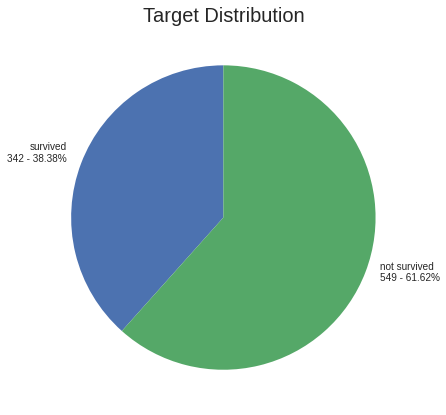

In [ ]:
# exolore whit matplotlib
# how is distribuite the target?
plt.style.use('seaborn')
plt.figure(figsize=(10, 7))
plt.title('Target Distribution', fontsize=20)
y=[]
s=0
ns=0
for i in train['Survived']:
  if i==1:
    s=s+1
  else:
    ns=ns+1
y.append(s)
y.append(ns)

mylabels = [f'survived\n{s} - {round((s*100)/(s+ns),2)}%\n', f'not survived\n{ns} - {round((ns*100)/(s+ns),2)}%\n']

plt.pie(y, labels = mylabels, startangle = 90)
plt.show()

In [ ]:
# since there are NaNs to be entered both in the train and in the test, I combine the 2 db
train_results = train["Survived"].copy() #dataset only with Y
train.drop("Survived", axis=1, inplace=True, errors="ignore") # I take off from train Y 
titanic = pd.concat([train, test], keys=['train','test'])
# I concatenate the 2 datasets using a multiindex (hierarchical) as the indexes overlap

In [ ]:
titanic.to_csv(f'{staging}titanic_merge.csv', index=False)

In [ ]:
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 11 
 1309 
 270 
 1039 
 0 
 1309 
 452.74 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 295 
 1014 
 186 
 C23 C25 C27 
 6 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 train 
 412 
 413 
 1 
 Minahan, Miss. Daisy E 
 female 
 33.0 
 1 
 0 
 19928 
 90.00 
 C78 
 Q 
 
 
 test 
 36 
 928 
 3 
 Roth, Miss. Sarah A 
 female 
 NaN 
 0 
 0 
 342712 
 8.05 
 NaN 
 S 
 
 
 train 
 343 
 344 
 2 
 Sedgwick, Mr. Charles Frederick Waddington 
 male 
 25.0 
 0 
 0 
 244361 
 13.00 
 NaN 
 S

##Pre-processing

###Feature engineering

In [ ]:
'''The same ticket is made out to several people.
I calculate the total number of people for whom the ticket owned by each passenger was purchased
Lo stesso biglietto è intestato a diverse persone.
Calcolo il totale delle persone per cui è stato comprato il biglietto posseduto da ogni passeggeto'''

titanic['TicketCrew'] = titanic['Ticket'].map(titanic['Ticket'].value_counts())

'''Fare is the total price of the ticket, not the cost per person. I calculate the fare per person.
Fare è il prezzo totale del biglietto, non il costo a persona. Calcolo il costo a persona.'''

titanic['FarePerPerson'] = round(titanic['Fare']/titanic['TicketCrew'], 3)

In [ ]:
# Now I'm dealing with Name. First I split the family name, then the title.
# Ora mi occupo di Name. Prima splitto il nome di famiglia, poi il titolo.
titanic['Title'] = titanic['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
titanic['FamilyName'] = titanic['Name'].map(lambda x: x.split(',')[0])
titanic['FamilyCrew'] = titanic['SibSp'] + titanic['Parch']+1
'''Attention: FamilyCrew indicates the family members on board, TicketCrew to how many people the ticket was made out to.
The two fields do not coincide: some people have also bought tickets for the servants
Attenzione: FamilyCrew indica i famigliari a bordo, TicketCrew a quante persone era intestato il biglietto.
I due campi non coincidono: alcune persone hanno acquistato il biglietto anche per i domestici'''

'Attention: FamilyCrew indicates the family members on board, TicketCrew to how many people the ticket was made out to.\nThe two fields do not coincide: some people have also bought tickets for the servants\nAttenzione: FamilyCrew indica i famigliari a bordo, TicketCrew a quante persone era intestato il biglietto.\nI due campi non coincidono: alcune persone hanno acquistato il biglietto anche per i domestici'

In [ ]:
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 16 
 1309 
 270 
 1039 
 0 
 1309 
 641.43 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 295 
 1014 
 186 
 C23 C25 C27 
 6 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 object 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 
 
 
 
 train 
 721 
 722 
 3 
 Jensen, Mr. Svend Lauritz 
 male 
 17.0 
 1 
 0 
 350048 
 7.0542 
 NaN 
 S 
 1 
 7.054 
 Mr 
 Jensen 
 2 
 
 
 test 
 243 
 1135 
 3 
 Hyman, Mr. Abraham 
 male 
 NaN 
 0 
 0 
 3470 
 7.8875 
 NaN 
 S 
 1 
 7.888 
 Mr 
 Hyman 
 1 
 
 
 train 
 519 
 520 
 3 
 Pavlovic, Mr. Stefo 
 male 
 32.0 
 0 
 0 
 349242 
 7.8958 
 NaN 
 S 
 1 
 7.896 
 Mr 
 Pavlovic 
 1

In [ ]:
print('Title')
print(f"{titanic['Title'].value_counts()} \n")
print('FamilyCrew')
print(f"{titanic['FamilyCrew'].value_counts()} \n")
print('TicketCrew')
print(f"{titanic['TicketCrew'].value_counts()} \n")

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64 

FamilyCrew
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilyCrew, dtype: int64 

TicketCrew
1     713
2     264
3     147
4      64
5      35
7      35
6      24
8      16
11     11
Name: TicketCrew, dtype: int64 



In [ ]:
print(f'Elenco valori unici: {titanic["Cabin"].explode().unique()}')
print()
print(f'Tot. unique: {titanic["Cabin"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Cabin"].isna().sum()}')

Elenco valori unici: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34'

In [ ]:
'''There are people who have multiple booths, there are many NaNs,
there are some letters that don't refer to decks (the Titanic only had decks A to G).
I divide the deck by the cabin number by taking only the first value that contains a valid deck and the cabin number.
In the case of NaN the cabin number will be 0 and the deck UN
Ci sono persone che hanno più cabine, ci sono molti NaN,
ci sono alcune lettere che non si riferiscono ai ponti (il Titanic aveva solo i ponti da A a G).
Divido il ponte dal numero della cabina prendendo solo il primo valore che contiene un ponte valido e il numero di cabina.
Nel caso di NaN il numero di cabina sarà 0 e il ponte UN'''

titanic['Cabin_num'] = titanic['Cabin'].str.extract('([a-zA-Z][0-9]+)', expand=False)
titanic['Deck'] = titanic['Cabin_num'].str.extract('([a-zA-Z])', expand=False)
titanic['Cabin_num'] = titanic['Cabin_num'].str.extract('([0-9]+)', expand=False)
print('Deck')
print(f"{titanic['Deck'].value_counts()}")
print()
print(f'Tot. unique: {titanic["Deck"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Deck"].isna().sum()}')
print()
print('Cabin_num')
print(f"{titanic['Cabin_num'].value_counts()}")
print()
print(f'Tot. unique: {titanic["Cabin_num"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Cabin_num"].isna().sum()}')

Deck
C    94
B    65
E    44
D    42
A    22
F    13
G     9
Name: Deck, dtype: int64

Tot. unique: 7

Tot. NaN: 1020

Cabin_num
6      9
33     8
22     7
23     7
34     7
101    7
46     6
78     6
57     6
2      6
10     5
20     5
50     5
36     5
4      5
49     5
45     5
31     5
28     5
26     4
24     4
38     4
30     4
52     4
35     4
51     4
96     4
7      4
58     4
19     4
73     3
37     3
21     3
18     3
5      3
69     3
63     3
39     3
17     3
68     3
11     3
86     3
80     3
32     3
77     3
41     2
9      2
126    2
25     2
82     2
71     2
121    2
62     2
92     2
44     2
85     2
89     2
65     2
47     2
83     2
15     2
93     2
67     2
116    2
125    2
55     2
8      2
123    2
106    2
54     2
124    2
40     2
102    1
42     1
60     1
3      1
132    1
148    1
61     1
29     1
97     1
53     1
43     1
130    1
128    1
90     1
91     1
103    1
56     1
110    1
87     1
94     1
99     1
118    1
104    1
48     1
111    

In [ ]:
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 18 
 1309 
 265 
 1044 
 0 
 1309 
 738.2 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 295 
 1014 
 186 
 C23 C25 C27 
 6 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 object 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Cabin_num 
 object 
 289 
 1020 
 104 
 6 
 9 
 1 
 3 
 
 
 Deck 
 object 
 289 
 1020 
 7 
 C 
 94 
 1 
 3 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 
 
 
 
 test 
 251 
 1143 
 3 
 Abrahamsson, Mr. Abraham August Johannes 
 male 
 20.0 
 0 
 0 
 SOTON/O2 3101284 
 7.9250 
 NaN 
 S 
 1 
 7.925 
 Mr 
 Abrahamsson 
 1 
 NaN 
 NaN 
 
 
 train 
 353 
 354 
 3 
 Arnold-Franchi, Mr. Josef 
 male 
 25.0 
 1 
 0 
 349237 
 17.8000 
 NaN 
 S 
 2 
 8.900 
 Mr 
 Arnold-Franchi 
 2 
 NaN 
 NaN 
 
 
 test 
 272 
 1164 
 1 
 Clark, Mrs. Walter Miller (Virginia McDowell) 
 female 
 26.0 
 1 
 0 
 13508 
 136.7792 
 C89 
 C 
 2 
 68.390 
 Mrs 
 Clark 
 2 
 89 
 C

In [ ]:
titanic['Cabin_num'].fillna(0, inplace=True)
titanic['Cabin_num'] = titanic['Cabin_num'].astype(int)
titanic['Deck'].fillna('UN', inplace=True)
titanic['Cabin'].fillna('UN', inplace=True)

In [ ]:
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 18 
 1309 
 1043 
 266 
 0 
 1309 
 753.53 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 object 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 object 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 
 
 
 
 train 
 106 
 107 
 3 
 Salkjelsvik, Miss. Anna Kristine 
 female 
 21.0 
 0 
 0 
 343120 
 7.6500 
 UN 
 S 
 1 
 7.650 
 Miss 
 Salkjelsvik 
 1 
 0 
 UN 
 
 
 76 
 77 
 3 
 Staneff, Mr. Ivan 
 male 
 NaN 
 0 
 0 
 349208 
 7.8958 
 UN 
 S 
 1 
 7.896 
 Mr 
 Staneff 
 1 
 0 
 UN 
 
 
 test 
 21 
 913 
 3 
 Olsen, Master. Artur Karl 
 male 
 9.0 
 0 
 1 
 C 17368 
 3.1708 
 UN 
 S 
 1 
 3.171 
 Master 
 Olsen 
 2 
 0 
 UN

In [ ]:
print(titanic.columns)
print(len(titanic.columns))

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketCrew', 'FarePerPerson',
       'Title', 'FamilyName', 'FamilyCrew', 'Cabin_num', 'Deck'],
      dtype='object')
18


###Missing values

In [ ]:
# What is missing I impute with a scikitlearn method but to do this
# all variables must be numeric
# Quello che manca lo imputo con un metodo di scikitlearn ma per fare questo
# tutte le variabili devono essere numeriche

'''Variables
ID
PassengerId, Name, Ticket, Cabin, FamilyName

Binary
Sex

Categorical
Pclass, Embarked, Title, Deck

Discrete
SibSp, Parch, TicketCrew, FamilyCrew, Cabin_num

Continue
Age, Fare, FarePerPerson

Ordinal
nan
'''

titanic["Pclass"] = titanic["Pclass"].astype('category')
titanic["Sex"] = titanic["Sex"].astype('category')
titanic["Embarked"] = titanic["Embarked"].astype('category')
titanic["Title"] = titanic["Title"].astype('category')
titanic["Deck"] = titanic["Deck"].astype('category')

In [ ]:
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 18 
 1309 
 1043 
 266 
 0 
 1309 
 448.17 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Pclass 
 category 
 1309 
 0 
 3 
 3 
 709 
 1 
 1 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 category 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 category 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 category 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 category 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 
 
 
 
 test 
 324 
 1216 
 1 
 Kreuchen, Miss. Emilie 
 female 
 39.0 
 0 
 0 
 24160 
 211.3375 
 UN 
 S 
 4 
 52.834 
 Miss 
 Kreuchen 
 1 
 0 
 UN 
 
 
 train 
 447 
 448 
 1 
 Seward, Mr. Frederic Kimber 
 male 
 34.0 
 0 
 0 
 113794 
 26.5500 
 UN 
 S 
 1 
 26.550 
 Mr 
 Seward 
 1 
 0 
 UN 
 
 
 647 
 648 
 1 
 Simonius-Blumer, Col. Oberst Alfons 
 male 
 56.0 
 0 
 0 
 13213 
 35.5000 
 A26 
 C 
 1 
 35.500 
 Col 
 Simonius-Blumer 
 1 
 26 
 A

In [ ]:
# this method is used for both Y when it is binary but not expressed in numbers
# when we have a binary nominal categorical feature not expressed in 0 and 1
# questo metodo si usa sia per Y quando è binario ma non è espresso in numeri
# quando abbiamo una feature categorica nominale binaria non espressa in 0 e 1
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
titanic["Sex_bin"] = lb.fit_transform(titanic[["Sex"]])
#see also label_binarize
#vedi anche label_binarize

In [ ]:
titanic["Embarked_cat"] = titanic["Embarked"].cat.codes # ATTENZIONE questo metodo assegna -1 a NaN e un int progressivo da 0 a n in base all'ordine alfabetico dei values
titanic["Title_cat"] = titanic["Title"].cat.codes
titanic["Deck_cat"] = titanic["Deck"].cat.codes
titanic["Pclass_cat"] = titanic["Pclass"].cat.codes # passo anche oclass perchè è una categorica da 1 a 3 ma deve essere da 0 a 2
titanic[["Pclass_cat", "Embarked_cat", "Title_cat", "Deck_cat"]].replace(-1, np.NaN)
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 23 
 1309 
 1043 
 266 
 0 
 1309 
 463.51 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Sex_bin 
 int64 
 1309 
 0 
 2 
 0.644 
 0.479 
 0.00 
 1.000 
 0.000 
 1.000 
 1.000 
 
 
 Embarked_cat 
 int8 
 1309 
 0 
 4 
 1.489 
 0.820 
 -1.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Title_cat 
 int8 
 1309 
 0 
 18 
 11.269 
 1.834 
 0.00 
 17.000 
 9.000 
 12.000 
 12.000 
 
 
 Deck_cat 
 int8 
 1309 
 0 
 8 
 5.969 
 2.052 
 0.00 
 7.000 
 7.000 
 7.000 
 7.000 
 
 
 Pclass_cat 
 int8 
 1309 
 0 
 3 
 1.295 
 0.838 
 0.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Pclass 
 category 
 1309 
 0 
 3 
 3 
 709 
 1 
 1 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 category 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 category 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 category 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 category 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 164 
 165 
 3 
 Panula, Master. Eino Viljami 
 male 
 1.0 
 4 
 1 
 3101295 
 39.6875 
 UN 
 S 
 7 
 5.670 
 Master 
 Panula 
 6 
 0 
 UN 
 1 
 2 
 8 
 7 
 2 
 
 
 test 
 142 
 1034 
 1 
 Ryerson, Mr. Arthur Larned 
 male 
 61.0 
 1 
 3 
 PC 17608 
 262.3750 
 B57 B59 B63 B66 
 C 
 7 
 37.482 
 Mr 
 Ryerson 
 5 
 57 
 B 
 1 
 0 
 12 
 1 
 0 
 
 
 train 
 33 
 34 
 2 
 Wheadon, Mr. Edward H 
 male 
 66.0 
 0 
 0 
 C.A. 24579 
 10.5000 
 UN 
 S 
 1 
 10.500 
 Mr 
 Wheadon 
 1 
 0 
 UN 
 1 
 2 
 12 
 7 
 1

In [ ]:
test = titanic[['Title_cat',
      'Parch', 'SibSp', 'Age']]
imp = IterativeImputer(max_iter=10, min_value=titanic['Age'].min(), max_value=titanic['Age'].max(), random_state=0)
imp.fit(test)
X = test
# the model learns that the second feature is double the first
titanicindex = titanic.index
a = pd.DataFrame(imp.transform(X), index=titanicindex)
a

0    1    2          3
train 0    12.0  0.0  1.0  22.000000
      1    13.0  0.0  1.0  38.000000
      2     9.0  0.0  0.0  26.000000
      3    13.0  0.0  1.0  35.000000
      4    12.0  0.0  0.0  35.000000
...         ...  ...  ...        ...
test  413  12.0  0.0  0.0  33.158422
      414   3.0  0.0  0.0  39.000000
      415  12.0  0.0  0.0  38.500000
      416  12.0  0.0  0.0  33.158422
      417   8.0  1.0  1.0  21.346110

[1309 rows x 4 columns]

In [ ]:
titanic[['Title_cat',
      'Parch', 'SibSp', 'Age']] = a[[0,1,2,3]]
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 23 
 1309 
 1306 
 3 
 0 
 1309 
 472.46 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Age 
 float64 
 1309 
 0 
 126 
 29.988 
 13.135 
 0.17 
 80.000 
 22.000 
 30.000 
 35.224 
 
 
 SibSp 
 float64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 float64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Sex_bin 
 int64 
 1309 
 0 
 2 
 0.644 
 0.479 
 0.00 
 1.000 
 0.000 
 1.000 
 1.000 
 
 
 Embarked_cat 
 int8 
 1309 
 0 
 4 
 1.489 
 0.820 
 -1.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Title_cat 
 float64 
 1309 
 0 
 18 
 11.269 
 1.834 
 0.00 
 17.000 
 9.000 
 12.000 
 12.000 
 
 
 Deck_cat 
 int8 
 1309 
 0 
 8 
 5.969 
 2.052 
 0.00 
 7.000 
 7.000 
 7.000 
 7.000 
 
 
 Pclass_cat 
 int8 
 1309 
 0 
 3 
 1.295 
 0.838 
 0.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Pclass 
 category 
 1309 
 0 
 3 
 3 
 709 
 1 
 1 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 category 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 category 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 category 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 category 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 542 
 543 
 3 
 Andersson, Miss. Sigrid Elisabeth 
 female 
 11.000000 
 4.0 
 2.0 
 347082 
 31.2750 
 UN 
 S 
 7 
 4.468 
 Miss 
 Andersson 
 7 
 0 
 UN 
 0 
 2 
 9.0 
 7 
 2 
 
 
 492 
 493 
 1 
 Molson, Mr. Harry Markland 
 male 
 55.000000 
 0.0 
 0.0 
 113787 
 30.5000 
 C30 
 S 
 1 
 30.500 
 Mr 
 Molson 
 1 
 30 
 C 
 1 
 2 
 12.0 
 2 
 0 
 
 
 128 
 129 
 3 
 Peter, Miss. Anna 
 female 
 23.411441 
 1.0 
 1.0 
 2668 
 22.3583 
 F E69 
 C 
 3 
 7.453 
 Miss 
 Peter 
 3 
 69 
 E 
 0 
 0 
 9.0 
 4 
 2

In [ ]:
ab = titanic[titanic['FarePerPerson'].isna()]
ab

PassengerId Pclass  ... Deck_cat Pclass_cat
test 152         1044      3  ...        7          2

[1 rows x 23 columns]

In [ ]:
test = titanic[['Title_cat',
      'Parch', 'SibSp', 'FarePerPerson', 'Pclass_cat', 'Deck_cat','TicketCrew']]
imp = IterativeImputer(max_iter=10, min_value=titanic['FarePerPerson'].min(), max_value=titanic['FarePerPerson'].max(), random_state=0)
imp.fit(test)
X = test
# the model learns that the second feature is double the first
titanicindex = titanic.index
a = pd.DataFrame(imp.transform(X), index=titanicindex)
a

0    1    2       3    4    5    6
train 0    12.0  0.0  1.0   7.250  2.0  7.0  1.0
      1    13.0  0.0  1.0  35.642  0.0  2.0  2.0
      2     9.0  0.0  0.0   7.925  2.0  7.0  1.0
      3    13.0  0.0  1.0  26.550  0.0  2.0  2.0
      4    12.0  0.0  0.0   8.050  2.0  7.0  1.0
...         ...  ...  ...     ...  ...  ...  ...
test  413  12.0  0.0  0.0   8.050  2.0  7.0  1.0
      414   3.0  0.0  0.0  36.300  0.0  2.0  3.0
      415  12.0  0.0  0.0   7.250  2.0  7.0  1.0
      416  12.0  0.0  0.0   8.050  2.0  7.0  1.0
      417   8.0  1.0  1.0   7.453  2.0  7.0  3.0

[1309 rows x 7 columns]

In [ ]:
titanic[['FarePerPerson']] = a[[3]]
info(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 23 
 1309 
 1306 
 3 
 0 
 1309 
 472.46 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Age 
 float64 
 1309 
 0 
 126 
 29.988 
 13.135 
 0.17 
 80.000 
 22.000 
 30.000 
 35.224 
 
 
 SibSp 
 float64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 float64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1309 
 0 
 254 
 14.751 
 13.552 
 0.00 
 128.082 
 7.550 
 8.050 
 15.000 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Sex_bin 
 int64 
 1309 
 0 
 2 
 0.644 
 0.479 
 0.00 
 1.000 
 0.000 
 1.000 
 1.000 
 
 
 Embarked_cat 
 int8 
 1309 
 0 
 4 
 1.489 
 0.820 
 -1.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Title_cat 
 float64 
 1309 
 0 
 18 
 11.269 
 1.834 
 0.00 
 17.000 
 9.000 
 12.000 
 12.000 
 
 
 Deck_cat 
 int8 
 1309 
 0 
 8 
 5.969 
 2.052 
 0.00 
 7.000 
 7.000 
 7.000 
 7.000 
 
 
 Pclass_cat 
 int8 
 1309 
 0 
 3 
 1.295 
 0.838 
 0.00 
 2.000 
 1.000 
 2.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Pclass 
 category 
 1309 
 0 
 3 
 3 
 709 
 1 
 1 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 category 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 category 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 category 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 category 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 224 
 225 
 1 
 Hoyt, Mr. Frederick Maxfield 
 male 
 38.0 
 1.0 
 0.0 
 19943 
 90.00 
 C93 
 S 
 2 
 45.00 
 Mr 
 Hoyt 
 2 
 93 
 C 
 1 
 2 
 12.0 
 2 
 0 
 
 
 353 
 354 
 3 
 Arnold-Franchi, Mr. Josef 
 male 
 25.0 
 1.0 
 0.0 
 349237 
 17.80 
 UN 
 S 
 2 
 8.90 
 Mr 
 Arnold-Franchi 
 2 
 0 
 UN 
 1 
 2 
 12.0 
 7 
 2 
 
 
 440 
 441 
 2 
 Hart, Mrs. Benjamin (Esther Ada Bloomfield) 
 female 
 45.0 
 1.0 
 1.0 
 F.C.C. 13529 
 26.25 
 UN 
 S 
 3 
 8.75 
 Mrs 
 Hart 
 3 
 0 
 UN 
 0 
 2 
 13.0 
 7 
 1

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    1309 non-null   int64   
 1   Pclass         1309 non-null   category
 2   Name           1309 non-null   object  
 3   Sex            1309 non-null   category
 4   Age            1309 non-null   float64 
 5   SibSp          1309 non-null   float64 
 6   Parch          1309 non-null   float64 
 7   Ticket         1309 non-null   object  
 8   Fare           1308 non-null   float64 
 9   Cabin          1309 non-null   object  
 10  Embarked       1307 non-null   category
 11  TicketCrew     1309 non-null   int64   
 12  FarePerPerson  1309 non-null   float64 
 13  Title          1309 non-null   category
 14  FamilyName     1309 non-null   object  
 15  FamilyCrew     1309 non-null   int64   
 16  Cabin_num      1309 non-null   int64   
 17  Deck         

In [ ]:
titanic_01 = titanic[['PassengerId', 'Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
      'FamilyCrew', 'Cabin_num', 'Sex_bin',
      'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']]

In [ ]:
info(titanic_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 13 
 1309 
 1309 
 0 
 0 
 1309 
 106.23 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.00 
 655.00 
 982.000 
 
 
 Age 
 float64 
 1309 
 0 
 126 
 29.988 
 13.135 
 0.17 
 80.000 
 22.00 
 30.00 
 35.224 
 
 
 SibSp 
 float64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.00 
 0.00 
 1.000 
 
 
 Parch 
 float64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.00 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.00 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 1309 
 0 
 254 
 14.751 
 13.552 
 0.00 
 128.082 
 7.55 
 8.05 
 15.000 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.00 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.00 
 0.00 
 0.000 
 
 
 Sex_bin 
 int64 
 1309 
 0 
 2 
 0.644 
 0.479 
 0.00 
 1.000 
 0.00 
 1.00 
 1.000 
 
 
 Embarked_cat 
 int8 
 1309 
 0 
 4 
 1.489 
 0.820 
 -1.00 
 2.000 
 1.00 
 2.00 
 2.000 
 
 
 Title_cat 
 float64 
 1309 
 0 
 18 
 11.269 
 1.834 
 0.00 
 17.000 
 9.00 
 12.00 
 12.000 
 
 
 Deck_cat 
 int8 
 1309 
 0 
 8 
 5.969 
 2.052 
 0.00 
 7.000 
 7.00 
 7.00 
 7.000 
 
 
 Pclass_cat 
 int8 
 1309 
 0 
 3 
 1.295 
 0.838 
 0.00 
 2.000 
 1.00 
 2.00 
 2.000 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 740 
 741 
 33.158422 
 0.0 
 0.0 
 1 
 30.000 
 1 
 45 
 1 
 2 
 12.0 
 3 
 0 
 
 
 13 
 14 
 39.000000 
 1.0 
 5.0 
 7 
 4.468 
 7 
 0 
 1 
 2 
 12.0 
 7 
 2 
 
 
 347 
 348 
 32.646992 
 1.0 
 0.0 
 2 
 8.050 
 2 
 0 
 0 
 2 
 13.0 
 7 
 2

In [ ]:
titanic_01[['SibSp', 'Parch', 'TicketCrew', 'FamilyCrew', 'Cabin_num']] = titanic[['SibSp', 'Parch', 'TicketCrew', 'FamilyCrew', 'Cabin_num']].astype('int')
titanic_01[['Sex_bin',
       'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']] = titanic[['Sex_bin',
       'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']].astype('int').astype('str')
titanic_01['Age'] = titanic_01['Age'].round(1)
titanic_01['FarePerPerson'] = titanic_01['FarePerPerson'].round(3)

In [ ]:
info(titanic_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 13 
 1309 
 1309 
 0 
 0 
 1309 
 453.6 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.0 
 1309.000 
 328.00 
 655.00 
 982.0 
 
 
 Age 
 float64 
 1309 
 0 
 121 
 29.993 
 13.135 
 0.2 
 80.000 
 22.00 
 30.00 
 35.2 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.0 
 8.000 
 0.00 
 0.00 
 1.0 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.0 
 9.000 
 0.00 
 0.00 
 0.0 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.0 
 11.000 
 1.00 
 1.00 
 3.0 
 
 
 FarePerPerson 
 float64 
 1309 
 0 
 254 
 14.751 
 13.552 
 0.0 
 128.082 
 7.55 
 8.05 
 15.0 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.0 
 11.000 
 1.00 
 1.00 
 2.0 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.0 
 148.000 
 0.00 
 0.00 
 0.0 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 1309 
 0 
 2 
 1 
 843 
 1 
 1 
 
 
 Embarked_cat 
 object 
 1309 
 0 
 4 
 2 
 914 
 1 
 2 
 
 
 Title_cat 
 object 
 1309 
 0 
 18 
 12 
 757 
 1 
 2 
 
 
 Deck_cat 
 object 
 1309 
 0 
 8 
 7 
 1020 
 1 
 1 
 
 
 Pclass_cat 
 object 
 1309 
 0 
 3 
 2 
 709 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 372 
 373 
 19.0 
 0 
 0 
 1 
 8.050 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 
 
 test 
 271 
 1163 
 33.2 
 0 
 0 
 1 
 7.750 
 1 
 0 
 1 
 1 
 12 
 7 
 2 
 
 
 train 
 656 
 657 
 33.2 
 0 
 0 
 1 
 7.896 
 1 
 0 
 1 
 2 
 12 
 7 
 2

In [ ]:
# Train
train_01 = titanic_01.loc['train']
train_01['Survived'] = train_results.astype('object')

# Test
test_01 = titanic_01.loc['test']

In [ ]:
info(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 14 
 891 
 891 
 0 
 0 
 891 
 337.97 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 891 
 0 
 891 
 446.000 
 257.354 
 1.0 
 891.000 
 223.500 
 446.00 
 668.500 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Survived 
 
 
 
 
 849 
 850 
 32.6 
 1 
 0 
 2 
 44.552 
 2 
 92 
 0 
 0 
 13 
 2 
 0 
 1 
 
 
 766 
 767 
 16.6 
 0 
 0 
 1 
 39.600 
 1 
 0 
 1 
 0 
 4 
 7 
 0 
 0 
 
 
 562 
 563 
 28.0 
 0 
 0 
 1 
 13.500 
 1 
 0 
 1 
 2 
 12 
 7 
 1 
 0

In [ ]:
info(test_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 13 
 418 
 418 
 0 
 0 
 418 
 144.94 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 418 
 0 
 418 
 1100.500 
 120.810 
 892.0 
 1309.000 
 996.25 
 1100.500 
 1204.750 
 
 
 Age 
 float64 
 418 
 0 
 93 
 30.404 
 12.814 
 0.2 
 76.000 
 22.00 
 30.000 
 36.000 
 
 
 SibSp 
 int64 
 418 
 0 
 7 
 0.447 
 0.897 
 0.0 
 8.000 
 0.00 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 418 
 0 
 8 
 0.392 
 0.981 
 0.0 
 9.000 
 0.00 
 0.000 
 0.000 
 
 
 TicketCrew 
 int64 
 418 
 0 
 9 
 2.060 
 1.745 
 1.0 
 11.000 
 1.00 
 1.000 
 2.000 
 
 
 FarePerPerson 
 float64 
 418 
 0 
 152 
 15.178 
 13.510 
 0.0 
 128.082 
 7.68 
 8.662 
 18.775 
 
 
 FamilyCrew 
 int64 
 418 
 0 
 9 
 1.840 
 1.519 
 1.0 
 11.000 
 1.00 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 418 
 0 
 58 
 10.146 
 24.118 
 0.0 
 132.000 
 0.00 
 0.000 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 418 
 0 
 2 
 1 
 266 
 1 
 1 
 
 
 Embarked_cat 
 object 
 418 
 0 
 3 
 2 
 270 
 1 
 1 
 
 
 Title_cat 
 object 
 418 
 0 
 9 
 12 
 240 
 1 
 2 
 
 
 Deck_cat 
 object 
 418 
 0 
 8 
 7 
 329 
 1 
 1 
 
 
 Pclass_cat 
 object 
 418 
 0 
 3 
 2 
 218 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 117 
 1009 
 1.0 
 1 
 1 
 3 
 5.567 
 3 
 6 
 0 
 2 
 9 
 6 
 2 
 
 
 309 
 1201 
 45.0 
 1 
 0 
 2 
 7.054 
 2 
 0 
 0 
 2 
 13 
 7 
 2 
 
 
 190 
 1082 
 34.0 
 1 
 0 
 2 
 13.000 
 2 
 0 
 1 
 2 
 12 
 7 
 1

In [ ]:
train_01.to_csv(f'{staging}train_01.csv', index=False)
test_01.to_csv(f'{staging}test_01.csv', index=False)

## Stat Explore

Check:
1. distribution
2. association or correlation with the target (Survived)
3. percentage of discrimination towards the target (also in combination with other features)

#### Distribution

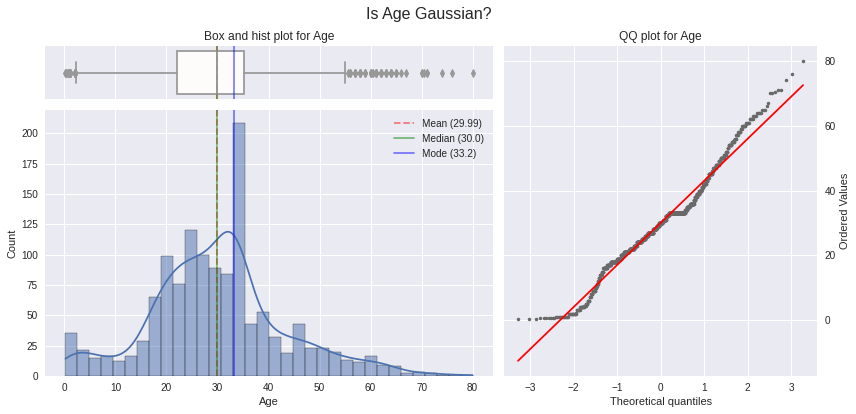


Shapiro-Wilk Test: statistics=0.975, p=0.000
Age does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=43.661, p=0.000
Age does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 11.490
15.000: 0.574, Age does not look normal (reject H0)
10.000: 0.654, Age does not look normal (reject H0)
5.000: 0.785, Age does not look normal (reject H0)
2.500: 0.915, Age does not look normal (reject H0)
1.000: 1.089, Age does not look normal (reject H0)






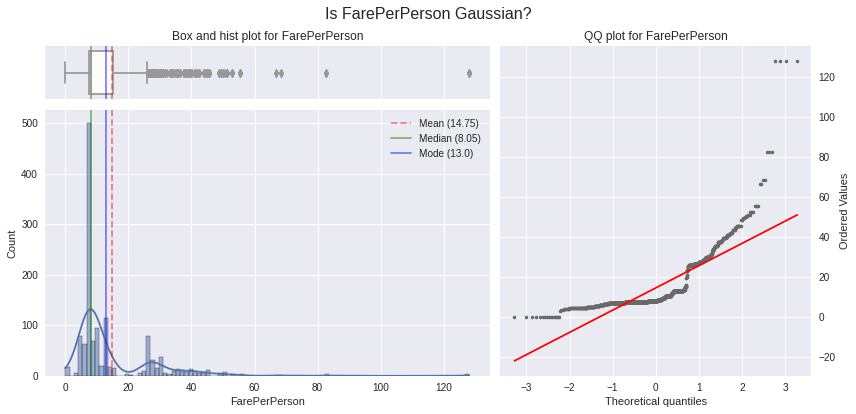


Shapiro-Wilk Test: statistics=0.674, p=0.000
FarePerPerson does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=914.384, p=0.000
FarePerPerson does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 139.210
15.000: 0.574, FarePerPerson does not look normal (reject H0)
10.000: 0.654, FarePerPerson does not look normal (reject H0)
5.000: 0.785, FarePerPerson does not look normal (reject H0)
2.500: 0.915, FarePerPerson does not look normal (reject H0)
1.000: 1.089, FarePerPerson does not look normal (reject H0)




You can view the distribution of values ​​only for variables of type int or float


In [ ]:
dist_cont(titanic_01, 'float')

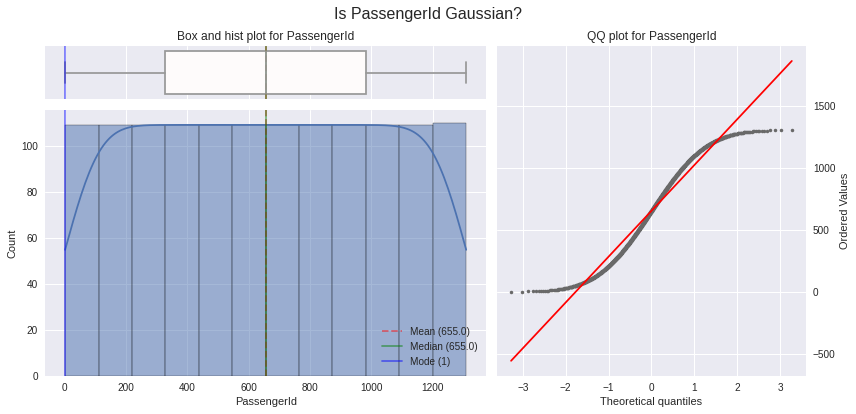


Shapiro-Wilk Test: statistics=0.955, p=0.000
PassengerId does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=1002.798, p=0.000
PassengerId does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 14.521
15.000: 0.574, PassengerId does not look normal (reject H0)
10.000: 0.654, PassengerId does not look normal (reject H0)
5.000: 0.785, PassengerId does not look normal (reject H0)
2.500: 0.915, PassengerId does not look normal (reject H0)
1.000: 1.089, PassengerId does not look normal (reject H0)






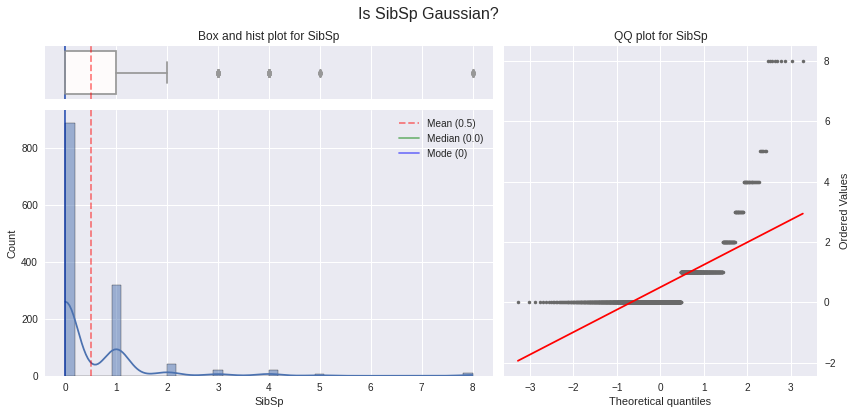


Shapiro-Wilk Test: statistics=0.511, p=0.000
SibSp does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=1089.016, p=0.000
SibSp does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 211.762
15.000: 0.574, SibSp does not look normal (reject H0)
10.000: 0.654, SibSp does not look normal (reject H0)
5.000: 0.785, SibSp does not look normal (reject H0)
2.500: 0.915, SibSp does not look normal (reject H0)
1.000: 1.089, SibSp does not look normal (reject H0)






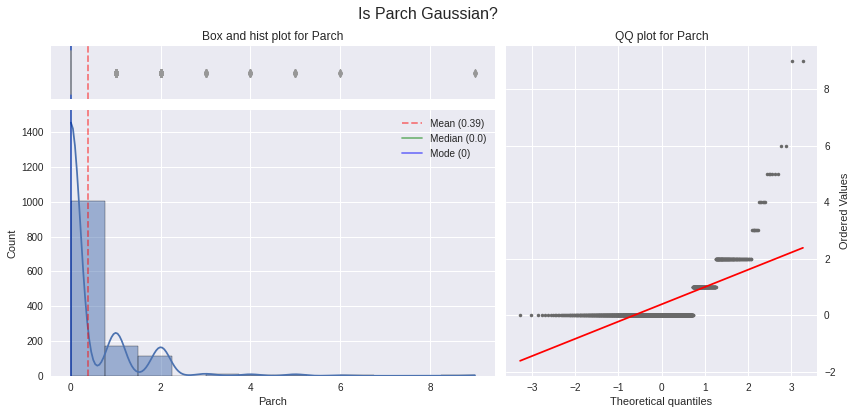


Shapiro-Wilk Test: statistics=0.498, p=0.000
Parch does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=1068.708, p=0.000
Parch does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 256.596
15.000: 0.574, Parch does not look normal (reject H0)
10.000: 0.654, Parch does not look normal (reject H0)
5.000: 0.785, Parch does not look normal (reject H0)
2.500: 0.915, Parch does not look normal (reject H0)
1.000: 1.089, Parch does not look normal (reject H0)






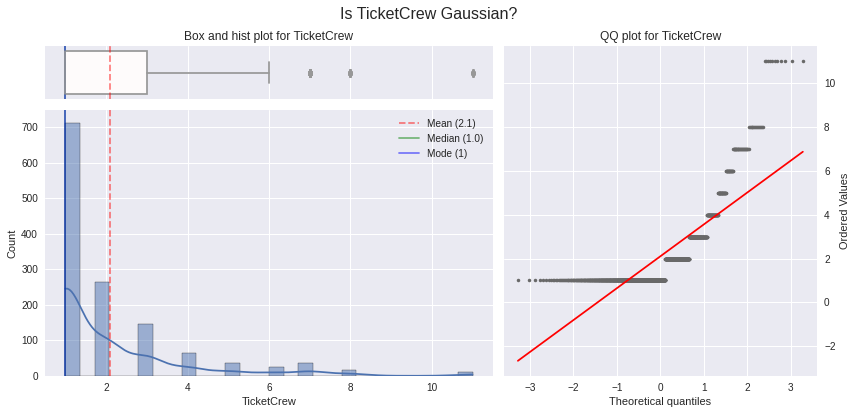


Shapiro-Wilk Test: statistics=0.665, p=0.000
TicketCrew does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=634.235, p=0.000
TicketCrew does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 152.278
15.000: 0.574, TicketCrew does not look normal (reject H0)
10.000: 0.654, TicketCrew does not look normal (reject H0)
5.000: 0.785, TicketCrew does not look normal (reject H0)
2.500: 0.915, TicketCrew does not look normal (reject H0)
1.000: 1.089, TicketCrew does not look normal (reject H0)






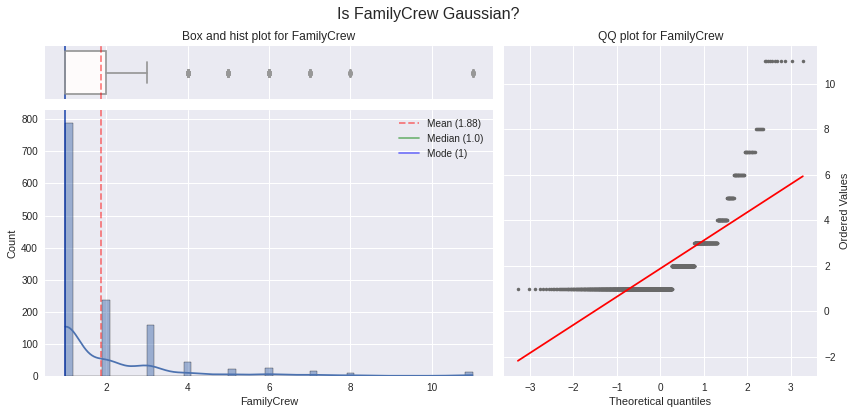


Shapiro-Wilk Test: statistics=0.609, p=0.000
FamilyCrew does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=815.083, p=0.000
FamilyCrew does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 171.914
15.000: 0.574, FamilyCrew does not look normal (reject H0)
10.000: 0.654, FamilyCrew does not look normal (reject H0)
5.000: 0.785, FamilyCrew does not look normal (reject H0)
2.500: 0.915, FamilyCrew does not look normal (reject H0)
1.000: 1.089, FamilyCrew does not look normal (reject H0)






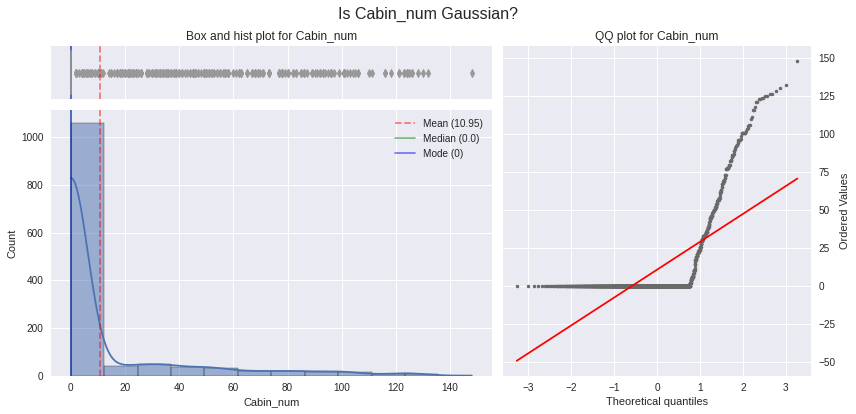


Shapiro-Wilk Test: statistics=0.491, p=0.000
Cabin_num does not look Gaussian (reject H0)

D’Agostino’s K^2 Test: statistics=718.887, p=0.000
Cabin_num does not look Gaussian (reject H0)

Anderson-Darling Test: statistic: 297.999
15.000: 0.574, Cabin_num does not look normal (reject H0)
10.000: 0.654, Cabin_num does not look normal (reject H0)
5.000: 0.785, Cabin_num does not look normal (reject H0)
2.500: 0.915, Cabin_num does not look normal (reject H0)
1.000: 1.089, Cabin_num does not look normal (reject H0)




You can view the distribution of values ​​only for variables of type int or float


In [ ]:
dist_cont(titanic_01, "int")

Le variabili continue non sono normali. Usando come modello un decision tree non fa alcuna differenza. In alcuni modelli come k-nearest neighbors e le regressioni, normalizzare o standardizzare i dati potrebbe portare a performance migliori.

Inoltre alcuni test che si basano sul presupposto che la variabile abbia un andamento normale potrebbe dare risultati non attendibili.

Distribuzione delle frequenze per le categoriche e distribuzione degli int come fossero categoriche.

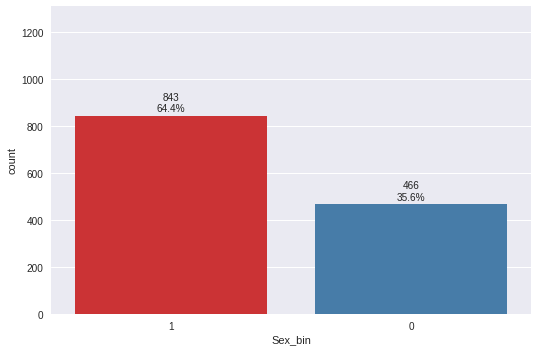

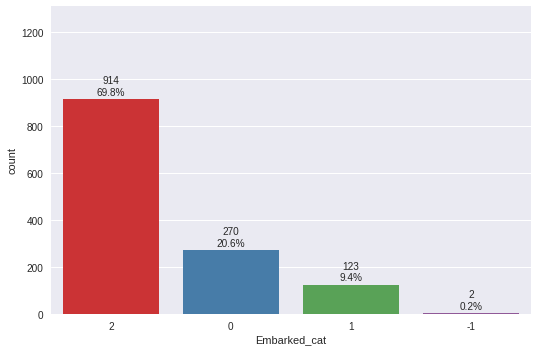

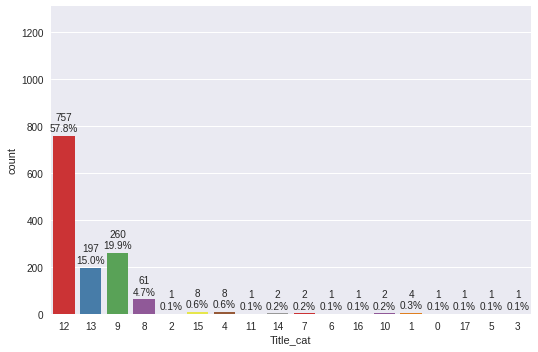

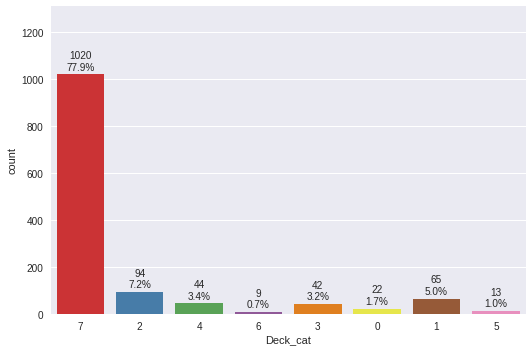

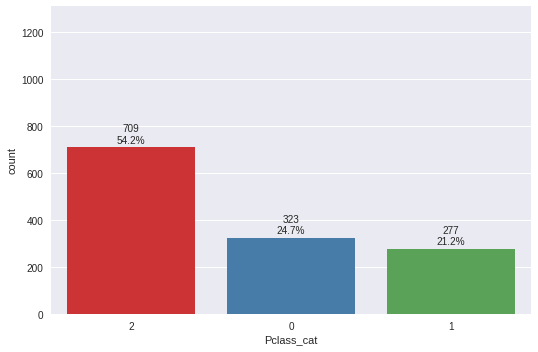

In [ ]:
# obj
for series in titanic_01.columns:
  if series != 'PassengerId':
    if search('object', titanic_01[series].dtype.name):
      p = titanic_01[series].count()
      plot = sns.catplot(data=titanic_01, x=series, kind="count", palette="Set1", legend=False, 
      height = 5 ,  # make the plot 5 units high 
      aspect = 1.5 )
      plot.set(ylim=(0, p))

      for i, bar in enumerate(plot.ax.patches):
          h = bar.get_height()
          perc = (h*100)/p
          perc = format(perc, '.1f')
          plot.ax.text(
              i, # bar index (x coordinate of text)
              h+10, # y coordinate of text
              # '{}'.format(int(h)),  # y label
              f'{format(int(h))}\n{perc}%',  
              ha='center', 
              va='bottom', 
              fontweight='normal', 
              size=10)

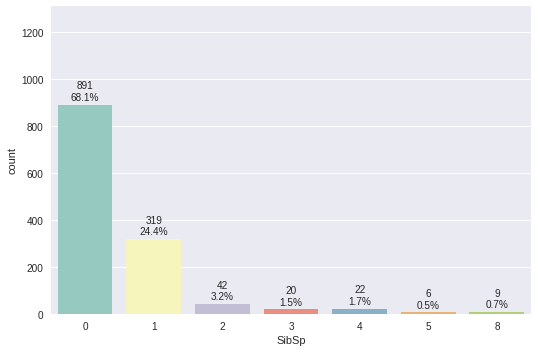

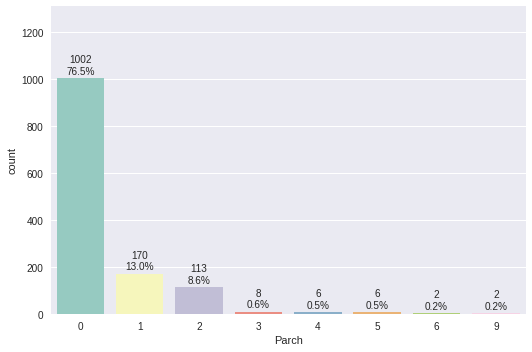

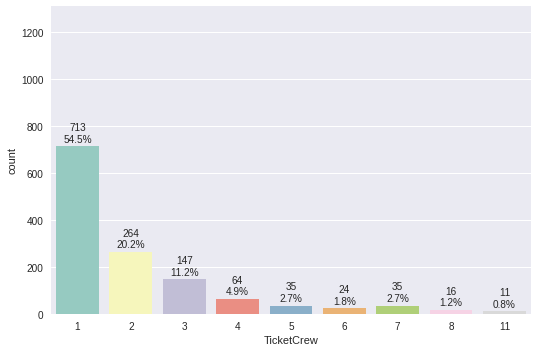

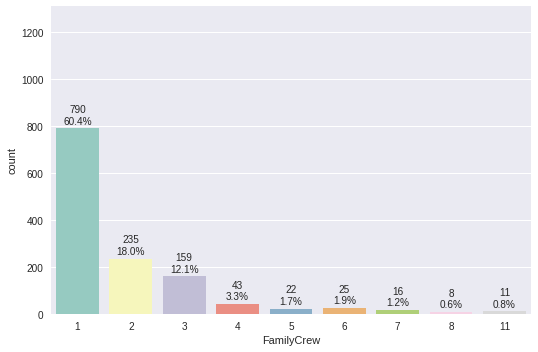

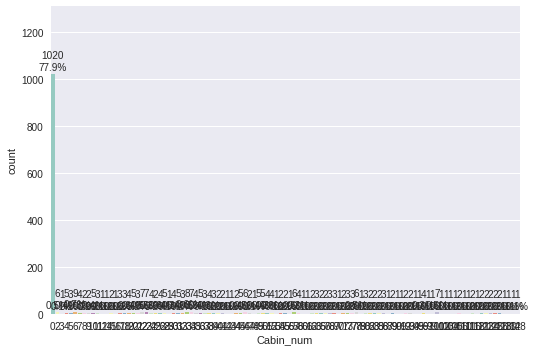

In [ ]:
# int
for series in titanic_01.columns:
  if series != 'PassengerId':
    if search('int', titanic_01[series].dtype.name):
      p = titanic_01[series].count()
      plot = sns.catplot(data=titanic_01, x=series, kind="count", palette="Set3", legend=False, 
      height = 5 ,  # make the plot 5 units high 
      aspect = 1.5 )
      plot.set(ylim=(0, p))

      for i, bar in enumerate(plot.ax.patches):
          h = bar.get_height()
          perc = (h*100)/p
          perc = format(perc, '.1f')
          plot.ax.text(
              i, # bar index (x coordinate of text)
              h+10, # y coordinate of text
              # '{}'.format(int(h)),  # y label
              f'{format(int(h))}\n{perc}%',  
              ha='center', 
              va='bottom', 
              fontweight='normal', 
              size=10)

Ci sono una serie di varibili numeriche discrete che potrebbero essere trattate come tali o come categoriche vista la distribuzione non normale di queste. Inoltre le continue potrebbero essere a loro categorizzate. Categorizzandole il modello sarebbe più robusto essendo la base dati semplificata, ma si perderebbe forse in accuracy. Occorre testare.

In [ ]:
info(titanic_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 13 
 1309 
 1309 
 0 
 0 
 1309 
 453.91 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.0 
 1309.000 
 328.00 
 655.00 
 982.0 
 
 
 Age 
 float64 
 1309 
 0 
 121 
 29.993 
 13.135 
 0.2 
 80.000 
 22.00 
 30.00 
 35.2 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.0 
 8.000 
 0.00 
 0.00 
 1.0 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.0 
 9.000 
 0.00 
 0.00 
 0.0 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.0 
 11.000 
 1.00 
 1.00 
 3.0 
 
 
 FarePerPerson 
 float64 
 1309 
 0 
 254 
 14.751 
 13.552 
 0.0 
 128.082 
 7.55 
 8.05 
 15.0 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.0 
 11.000 
 1.00 
 1.00 
 2.0 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.0 
 148.000 
 0.00 
 0.00 
 0.0 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 1309 
 0 
 2 
 1 
 843 
 1 
 1 
 
 
 Embarked_cat 
 object 
 1309 
 0 
 4 
 2 
 914 
 1 
 2 
 
 
 Title_cat 
 object 
 1309 
 0 
 18 
 12 
 757 
 1 
 2 
 
 
 Deck_cat 
 object 
 1309 
 0 
 8 
 7 
 1020 
 1 
 1 
 
 
 Pclass_cat 
 object 
 1309 
 0 
 3 
 2 
 709 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 
 
 
 
 train 
 865 
 866 
 42.0 
 0 
 0 
 1 
 13.000 
 1 
 0 
 0 
 2 
 13 
 7 
 1 
 
 
 797 
 798 
 31.0 
 0 
 0 
 1 
 8.683 
 1 
 0 
 0 
 2 
 13 
 7 
 2 
 
 
 656 
 657 
 33.2 
 0 
 0 
 1 
 7.896 
 1 
 0 
 1 
 2 
 12 
 7 
 2

In [ ]:
!pip install jenkspy

     |████████████████████████████████| 55 kB 2.6 MB/s 
  Created wheel for jenkspy: filename=jenkspy-0.2.0-cp37-cp37m-linux_x86_64.whl size=71200 sha256=b1f06ff3d62b4a6c4da5e586cb3452e51ea660429d734571311ee708d1a50857
  Stored in directory: /root/.cache/pip/wheels/d8/d1/42/9bd05164ef706b84674905892f0542f8db6ac4a652473ca7e0
Successfully built jenkspy


In [ ]:
# add bin all float
import jenkspy
labels = [0, 1, 2, 3, 4]
for series in titanic_01.columns:
  if train_01[series].dtype == float:
    if series != 'PassengerId':
      breaks = jenkspy.jenks_breaks(titanic_01[series], nb_class=5)
      titanic_01[f'{series}_bin'] = pd.cut(titanic_01[series] , bins=breaks, labels=labels, include_lowest=True)
      titanic_01[f'{series}_bin'] = titanic_01[f'{series}_bin'].astype('object')

In [ ]:
labels = [0, 1, 2, 3, 4]
for series in titanic_01.columns:
  if titanic_01[series].dtype == int:
    if series != 'PassengerId':
      min_value = titanic_01[series].min()
      max_value = titanic_01[series].max()
      breaks = np.linspace(min_value, max_value, 6)
      titanic_01[f'{series}_bin'] = pd.cut(titanic_01[series] , bins=breaks, labels=labels, include_lowest=True)
      titanic_01[f'{series}_bin'] = titanic_01[f'{series}_bin'].astype('object')

In [ ]:
info(titanic_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 20 
 1309 
 1309 
 0 
 0 
 1309 
 749.08 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.0 
 1309.000 
 328.00 
 655.00 
 982.0 
 
 
 Age 
 float64 
 1309 
 0 
 121 
 29.993 
 13.135 
 0.2 
 80.000 
 22.00 
 30.00 
 35.2 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.0 
 8.000 
 0.00 
 0.00 
 1.0 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.0 
 9.000 
 0.00 
 0.00 
 0.0 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.0 
 11.000 
 1.00 
 1.00 
 3.0 
 
 
 FarePerPerson 
 float64 
 1309 
 0 
 254 
 14.751 
 13.552 
 0.0 
 128.082 
 7.55 
 8.05 
 15.0 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.0 
 11.000 
 1.00 
 1.00 
 2.0 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.0 
 148.000 
 0.00 
 0.00 
 0.0 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 1309 
 0 
 2 
 1 
 843 
 1 
 1 
 
 
 Embarked_cat 
 object 
 1309 
 0 
 4 
 2 
 914 
 1 
 2 
 
 
 Title_cat 
 object 
 1309 
 0 
 18 
 12 
 757 
 1 
 2 
 
 
 Deck_cat 
 object 
 1309 
 0 
 8 
 7 
 1020 
 1 
 1 
 
 
 Pclass_cat 
 object 
 1309 
 0 
 3 
 2 
 709 
 1 
 1 
 
 
 Age_bin 
 object 
 1309 
 0 
 5 
 2 
 525 
 1 
 1 
 
 
 FarePerPerson_bin 
 object 
 1309 
 0 
 5 
 0 
 994 
 1 
 1 
 
 
 SibSp_bin 
 object 
 1309 
 0 
 5 
 0 
 1210 
 1 
 1 
 
 
 Parch_bin 
 object 
 1309 
 0 
 5 
 0 
 1172 
 1 
 1 
 
 
 TicketCrew_bin 
 object 
 1309 
 0 
 5 
 0 
 1124 
 1 
 1 
 
 
 FamilyCrew_bin 
 object 
 1309 
 0 
 5 
 0 
 1184 
 1 
 1 
 
 
 Cabin_num_bin 
 object 
 1309 
 0 
 5 
 0 
 1113 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Age_bin 
 FarePerPerson_bin 
 SibSp_bin 
 Parch_bin 
 TicketCrew_bin 
 FamilyCrew_bin 
 Cabin_num_bin 
 
 
 
 
 train 
 112 
 113 
 22.0 
 0 
 0 
 1 
 8.050 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 287 
 288 
 22.0 
 0 
 0 
 1 
 7.896 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 25 
 26 
 38.0 
 1 
 5 
 7 
 4.484 
 7 
 0 
 0 
 2 
 13 
 7 
 2 
 3 
 0 
 0 
 2 
 2 
 2 
 0

In [ ]:
# Train
train_01 = titanic_01.loc['train']
train_01['Survived'] = train_results.astype('object')

# Test
test_01 = titanic_01.loc['test']

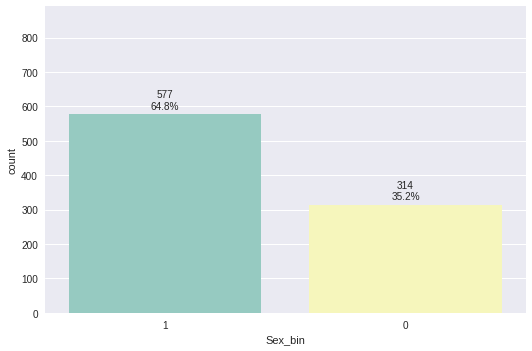

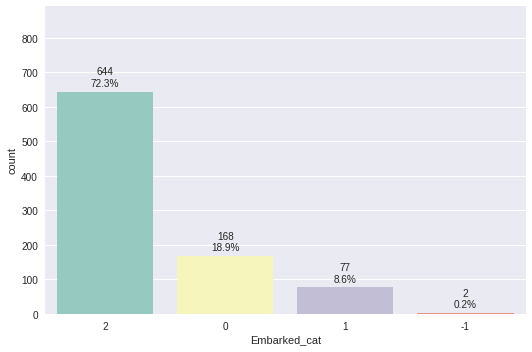

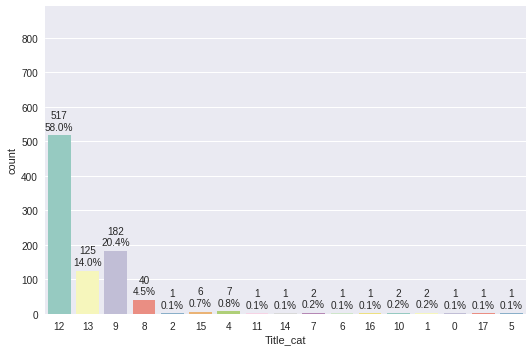

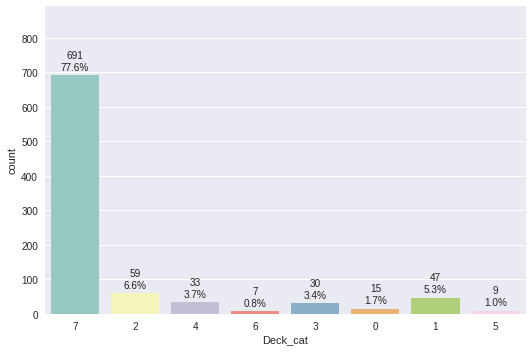

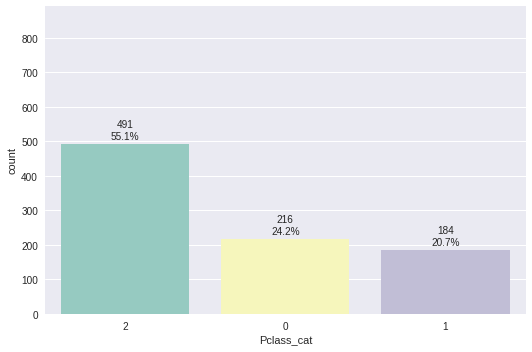

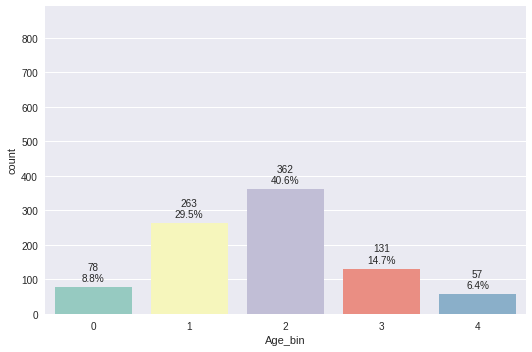

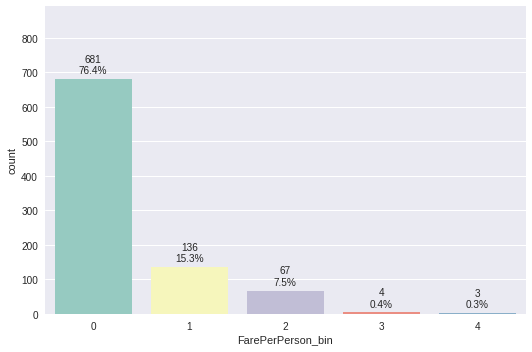

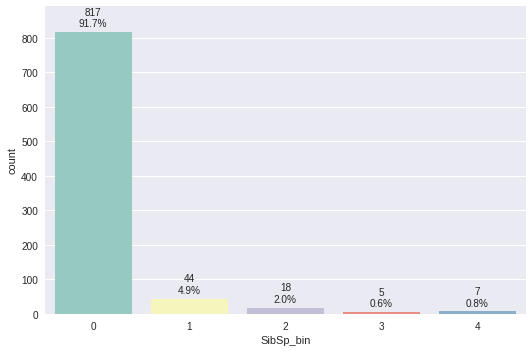

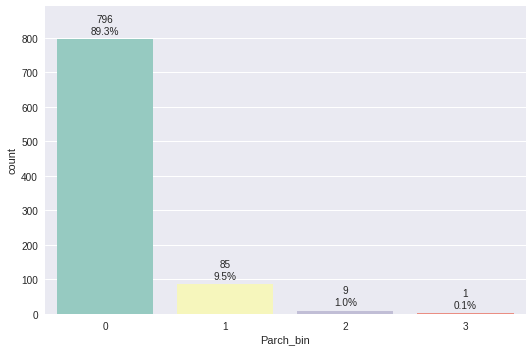

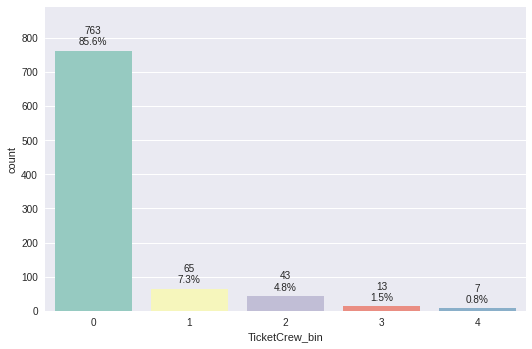

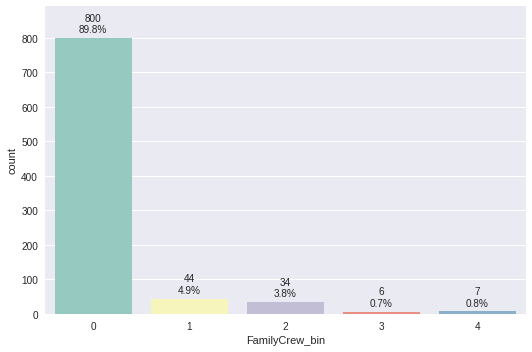

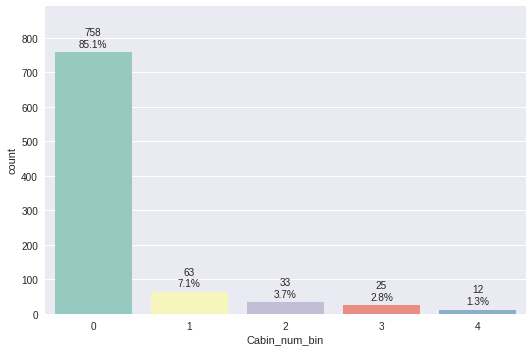

In [ ]:
# obj
for series in train_01.columns:
  if series != 'PassengerId' and series != 'Survived':
    if search('object', train_01[series].dtype.name):
      p = train_01[series].count()
      plot = sns.catplot(data=train_01, x=series, kind="count", palette="Set3", legend=False, 
      height = 5 ,  # make the plot 5 units high 
      aspect = 1.5 )
      plot.set(ylim=(0, p))

      for i, bar in enumerate(plot.ax.patches):
          h = bar.get_height()
          perc = (h*100)/p
          perc = format(perc, '.1f')
          plot.ax.text(
              i, # bar index (x coordinate of text)
              h+10, # y coordinate of text
              # '{}'.format(int(h)),  # y label
              f'{format(int(h))}\n{perc}%',  
              ha='center', 
              va='bottom', 
              fontweight='normal', 
              size=10)

#### Association or correlation with the target (Survived)

In [ ]:
table_chi2=[]
table_no_chi2=[]

for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype == object):
      chi_square_score, prob, degree_f, p = chi2_by_hand(train_01, 'Survived', i, '0.05')

      if p >= 0.00001:
        p = format(p, '.5f')
        table_chi2.append({'feat': i,
                      'chi2_score': chi_square_score,
                      'chi2_tab': prob,
                      'doff': degree_f,
                      'p-val': p,
                      'dtype': train_01[i].dtype})
        # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: {p}')
        # print(f'{type(p)}')
      
      elif p < 0.00001:
        p = format(p, '.5f')
        table_chi2.append({'feat': i,
                'chi2_score': chi_square_score,
                'chi2_tab': prob,
                'doff': degree_f,
                'p-val': f'< {p}',
                'dtype': train_01[i].dtype})
        # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: < {p}')

      else:
        table_chi2.append({'feat': i,
                'chi2_score': chi_square_score,
                'chi2_tab': prob,
                'doff': degree_f,
                'p-val': f'= {p}',
                'dtype': train_01[i].dtype})
        # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: = {p}') 

    else:
      table_no_chi2.append({'feat': i,
                'dtype': train_01[i].dtype})
    #   print(f'{i} is not str. {i} is {train_01[i].dtype}')

table_chi2 = pd.DataFrame(table_chi2).set_index('feat')
table_chi2.index.name=None

table_chi2

table_no_chi2 = pd.DataFrame(table_no_chi2).set_index('feat')
table_no_chi2.index.name=None

table_no_chi2

display_side_by_side(table_chi2, table_no_chi2, titles = [f'chi-square test for binary target and categorical variables', f'non-categorical variables'])

chi-square test for binary target and categorical variables 
 
 
 
 chi2_score 
 chi2_tab 
 doff 
 p-val 
 dtype 
 
 
 
 
 Sex_bin 
 263.050574 
 3.841 
 1 
 < 0.00000 
 object 
 
 
 Embarked_cat 
 29.670614 
 7.815 
 3 
 < 0.00000 
 object 
 
 
 Title_cat 
 300.023021 
 26.296 
 16 
 < 0.00000 
 object 
 
 
 Deck_cat 
 101.560814 
 14.067 
 7 
 < 0.00000 
 object 
 
 
 Pclass_cat 
 102.888989 
 5.991 
 2 
 < 0.00000 
 object 
 
 
 Age_bin 
 9.018621 
 9.488 
 4 
 0.06064 
 object 
 
 
 FarePerPerson_bin 
 79.991466 
 9.488 
 4 
 < 0.00000 
 object 
 
 
 SibSp_bin 
 11.431633 
 9.488 
 4 
 0.02212 
 object 
 
 
 Parch_bin 
 9.108161 
 7.815 
 3 
 0.02789 
 object 
 
 
 TicketCrew_bin 
 22.824020 
 9.488 
 4 
 0.00014 
 object 
 
 
 FamilyCrew_bin 
 17.591942 
 9.488 
 4 
 0.00148 
 object 
 
 
 Cabin_num_bin 
 48.990163 
 9.488 
 4 
 < 0.00000 
 object 
 
 
 non-categorical variables 
 
 
 
 dtype 
 
 
 
 
 Age 
 float64 
 
 
 SibSp 
 int64 
 
 
 Parch 
 int64 
 
 
 TicketCrew 
 int64 
 
 
 FarePerPerson 
 float64 
 
 
 FamilyCrew 
 int64 
 
 
 Cabin_num 
 int64

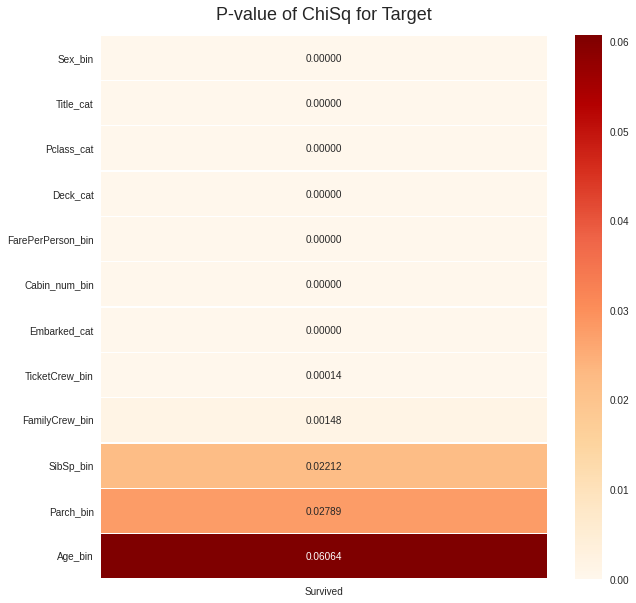

In [ ]:
# train_01 = train_01.astype(float)
train_01['PassengerId'] = train_01['PassengerId'].astype(object)
index=[]
pv=[]
for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype == object):
      chi_square_score, prob, degree_f, p = chi2_by_hand(train_01, 'Survived', i, '0.05')
      index.append(i)
      pv.append(p)

pv = pd.DataFrame(pv, index =index, columns =['Survived'])
pv = pv.sort_values(by=['Survived'])



fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(pv, linewidths=0.3,
                fmt='.5f',
                cmap="OrRd",
                annot=True,
                vmin=0)

heatmap.set_title('P-value of ChiSq for Target', fontdict={'fontsize':18}, pad=16);

In [ ]:
info(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 21 
 891 
 891 
 0 
 0 
 891 
 563.57 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 PassengerId 
 object 
 891 
 0 
 891 
 1 
 1 
 1 
 3 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Age_bin 
 object 
 891 
 0 
 5 
 2 
 362 
 1 
 1 
 
 
 FarePerPerson_bin 
 object 
 891 
 0 
 5 
 0 
 681 
 1 
 1 
 
 
 SibSp_bin 
 object 
 891 
 0 
 5 
 0 
 817 
 1 
 1 
 
 
 Parch_bin 
 object 
 891 
 0 
 4 
 0 
 796 
 1 
 1 
 
 
 TicketCrew_bin 
 object 
 891 
 0 
 5 
 0 
 763 
 1 
 1 
 
 
 FamilyCrew_bin 
 object 
 891 
 0 
 5 
 0 
 800 
 1 
 1 
 
 
 Cabin_num_bin 
 object 
 891 
 0 
 5 
 0 
 758 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Age_bin 
 FarePerPerson_bin 
 SibSp_bin 
 Parch_bin 
 TicketCrew_bin 
 FamilyCrew_bin 
 Cabin_num_bin 
 Survived 
 
 
 
 
 350 
 351 
 23.0 
 0 
 0 
 1 
 9.225 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 525 
 526 
 40.5 
 0 
 0 
 1 
 7.750 
 1 
 0 
 1 
 1 
 12 
 7 
 2 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 289 
 290 
 22.0 
 0 
 0 
 1 
 7.750 
 1 
 0 
 0 
 1 
 9 
 7 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1

In [ ]:
table=[]
table_chi2=[]
index=[]
col=[]


for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype == object):
      index.append(i)
      col.append(i)
      for j in train_01.columns:
        if j != 'PassengerId' and j != 'Survived':
          if(train_01[j].dtype == object):
            chi_square_score, prob, degree_f, p = chi2_by_hand(train_01, i, j, '0.05')

            if p >= 0.00001:
              float(p)
              p = format(p, '.5f')
              table.append(p)
              # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: {p}')
              # print(f'{type(p)}')
            
            elif p < 0.00001:
              float(p)
              p = format(p, '.5f')
              table.append(p)
              # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: < {p}')

            else:
              float(p)
              table.append(p)
              # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: = {p}') 

      table_chi2.append(table)
      table=[]

table_chi2 = pd.DataFrame(table_chi2, index=index, columns =col)
table_chi2.index.name=None
table_chi2 = table_chi2.astype(float)

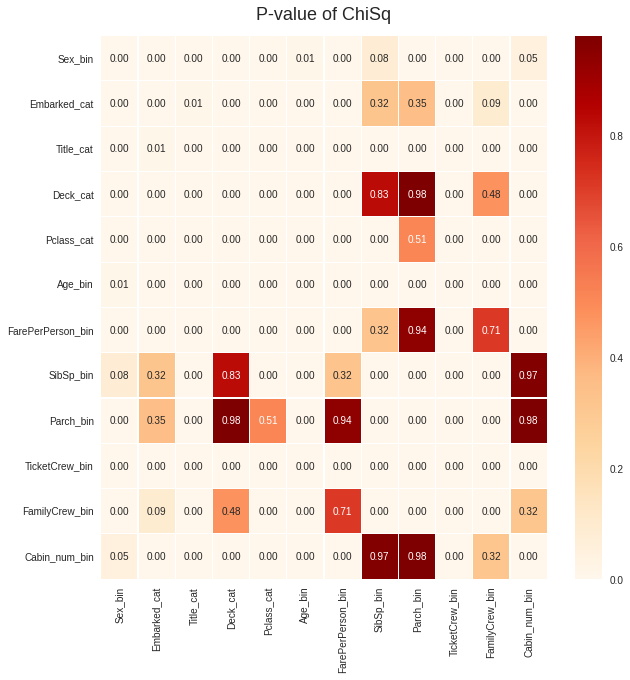

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(table_chi2, linewidths=0.1,
                fmt='.2f',
                cmap="OrRd",
                annot=True,
                vmin=0)

heatmap.set_title('P-value of ChiSq', fontdict={'fontsize':18}, pad=16);

In [ ]:
table=[]
table_chi2=[]
index=[]
col=[]


for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype == object):
      index.append(i)
      col.append(i)
      for j in train_01.columns:
        if j != 'PassengerId' and j != 'Survived':
          if(train_01[j].dtype == object):
            chi_square_score, prob, degree_f, p = chi2_by_hand(train_01, i, j, '0.05')
            float(chi_square_score)
            # float(prob)
            chi_square_score = format(chi_square_score, '.5f')
            # prob = format(prob, '.5f')
            table.append(chi_square_score)
              # print(f'Chi2_score {i}: {chi_square_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: < {p}')

           
      table_chi2.append(table)
      table=[]

table_chi2 = pd.DataFrame(table_chi2, index=index, columns =col)
table_chi2.index.name=None
table_chi2 = table_chi2.astype(float)

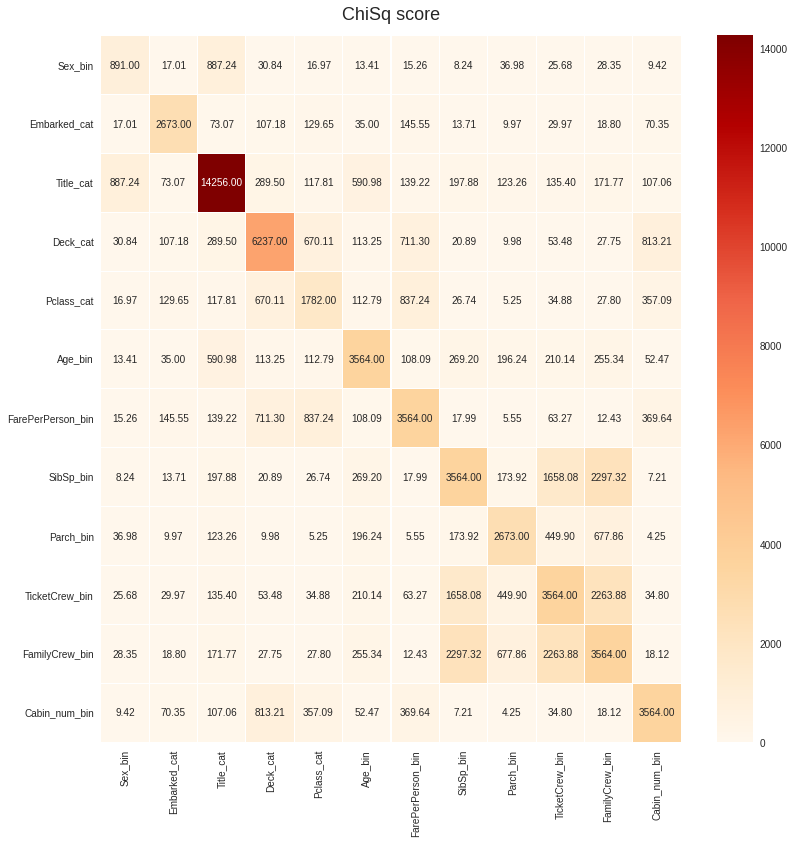

In [ ]:
fig, ax = plt.subplots(figsize=(13, 13))

heatmap = sns.heatmap(table_chi2, linewidths=0.1,
                fmt='.2f',
                cmap="OrRd",
                annot=True,
                vmin=0)

heatmap.set_title('ChiSq score', fontdict={'fontsize':18}, pad=16);

In [ ]:
### T-test for μ 

train_01['Survived'] = train_01['Survived'].astype(int)
surv0 = train_01[train_01['Survived'] == 0]
surv1 = train_01[train_01['Survived'] == 1]

for i in train_01.columns:
  if i != 'Survived':
    if(train_01[i].dtype != object):
      Ttest_indResult, pvalue = stats.ttest_ind(surv0[i], surv1[i])
      if pvalue >= 0.00001:
        Ttest_indResult = format(Ttest_indResult, '.5f')
        pvalue = format(pvalue, '.5f')
        print(f'T-test μ {i}: {Ttest_indResult} | P-Value: {pvalue}')
      
      elif pvalue < 0.00001:
        Ttest_indResult = format(Ttest_indResult, '.5f')
        pvalue = format(pvalue, '.5f')
        print(f'T-test μ {i}: {Ttest_indResult} | P-Value: < {pvalue}')

      else:
        Ttest_indResult = format(Ttest_indResult, '.5f')
        print(f'T-test μ {i}: {Ttest_indResult} | P-Value: = {pvalue}')
      

    # else:
      # print(f'{i} is not num {i} is {train_01[i].dtype}')

T-test μ Age: 2.21413 | P-Value: 0.02707
T-test μ SibSp: 1.05384 | P-Value: 0.29224
T-test μ Parch: -2.44202 | P-Value: 0.01480
T-test μ TicketCrew: -1.94102 | P-Value: 0.05257
T-test μ FarePerPerson: -8.97845 | P-Value: < 0.00000
T-test μ FamilyCrew: -0.49618 | P-Value: 0.61989
T-test μ Cabin_num: -7.03873 | P-Value: < 0.00000


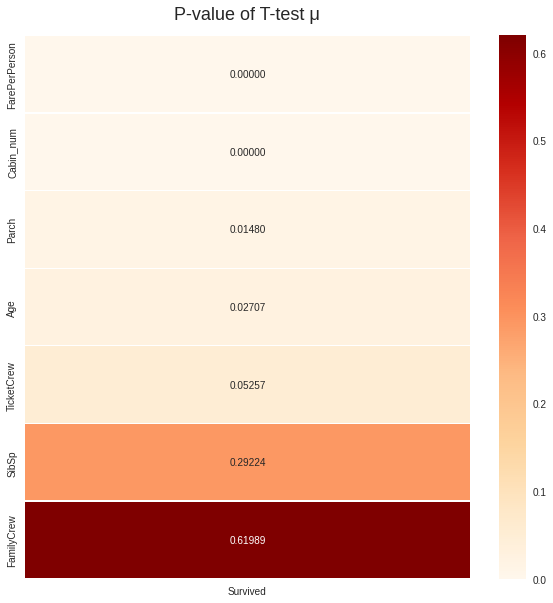

In [ ]:
train_01['Survived'] = train_01['Survived'].astype(int)
surv0 = train_01[train_01['Survived'] == 0]
surv1 = train_01[train_01['Survived'] == 1]

index=[]
pv=[]

for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype != object):
      Ttest_indResult, pvalue = stats.ttest_ind(surv0[i], surv1[i])
      index.append(i)
      pv.append(pvalue)


pv = pd.DataFrame(pv, index =index, columns =['Survived'])
pv = pv.sort_values(by=['Survived'])



fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(pv, linewidths=0.3,
                fmt='.5f',
                cmap="OrRd",
                annot=True,
                vmin=0)

heatmap.set_title('P-value of T-test μ', fontdict={'fontsize':18}, pad=16);

In [ ]:
### T-test for σ

train_01['Survived'] = train_01['Survived'].astype(int)
surv0 = train_01[train_01['Survived'] == 0]
surv1 = train_01[train_01['Survived'] == 1]

for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype != object):
      stat, pvalue = stats.bartlett(surv0[i], surv1[i])
      #  bartlett si usa solo per popolazioni normali. Per i campioni provenienti da popolazioni significativamente non normali,
      # il test di Levene è più robusto stats.levene. Vedi anche il metodo Flinger stats.fligner
      
      if pvalue >= 0.00001:
        stat = format(stat, '.5f')
        pvalue = format(pvalue, '.5f')
        print(f'T-test σ {i}: {stat} | P-Value: {pvalue}')
      
      elif pvalue < 0.00001:
        stat = format(stat, '.5f')
        pvalue = format(pvalue, '.5f')
        print(f'T-test σ {i}: {stat} | P-Value: < {pvalue}')

      else:
        stat = format(stat, '.5f')
        print(f'T-test σ {i}: {stat} | P-Value: = {pvalue}')
      

    # else:
      # print(f'{i} is not num {i} is {train_01[i].dtype}')


T-test σ Age: 2.33300 | P-Value: 0.12666
T-test σ SibSp: 130.73499 | P-Value: < 0.00000
T-test σ Parch: 1.73086 | P-Value: 0.18830
T-test σ TicketCrew: 34.99383 | P-Value: < 0.00000
T-test σ FarePerPerson: 144.19934 | P-Value: < 0.00000
T-test σ FamilyCrew: 72.11137 | P-Value: < 0.00000
T-test σ Cabin_num: 79.38382 | P-Value: < 0.00000


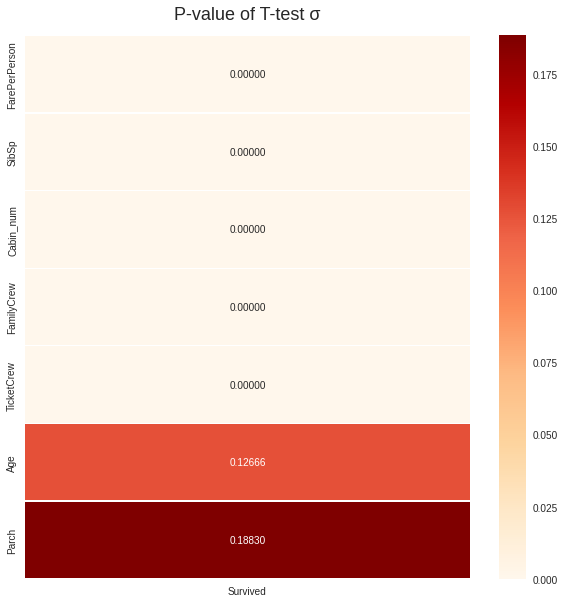

In [ ]:
train_01['Survived'] = train_01['Survived'].astype(int)
surv0 = train_01[train_01['Survived'] == 0]
surv1 = train_01[train_01['Survived'] == 1]

index=[]
pv=[]

for i in train_01.columns:
  if i != 'PassengerId' and i != 'Survived':
    if(train_01[i].dtype != object):
      stat, pvalue = stats.bartlett(surv0[i], surv1[i])
      #  bartlett si usa solo per popolazioni normali. Per i campioni provenienti da popolazioni significativamente non normali,
      # il test di Levene è più robusto stats.levene. Vedi anche il metodo Flinger stats.fligner
      index.append(i)
      pv.append(pvalue)


pv = pd.DataFrame(pv, index =index, columns =['Survived'])
pv = pv.sort_values(by=['Survived'])



fig, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(pv, linewidths=0.3,
                fmt='.5f',
                cmap="OrRd",
                annot=True,
                vmin=0)

heatmap.set_title('P-value of T-test σ', fontdict={'fontsize':18}, pad=16);

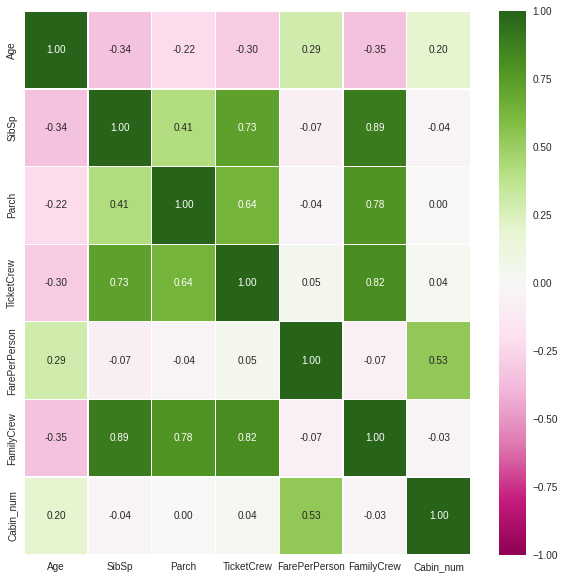

In [ ]:
# train_01 = train_01.astype(float)
train_01['Survived'] = train_01['Survived'].astype(object)
train_01['PassengerId'] = train_01['PassengerId'].astype(object)
corr_matrix = train_01.corr(method='pearson', min_periods=train_01.shape[0])

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(corr_matrix,
                linewidths=0.3,
                fmt='.2f',
                cmap="PiYG",
                annot=True,
                vmin=-1, vmax=1);

Conclusioni:
Proseguo ora per vedere la distribuzione, cioè chi discrimina di più.

#### Percentage of discrimination towards the target (also in combination with other features)



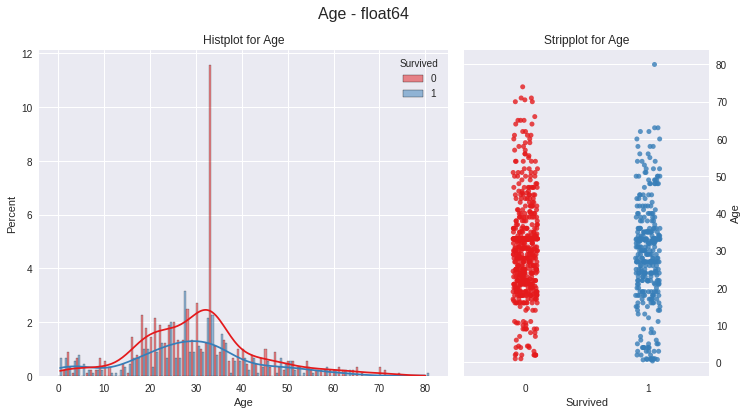

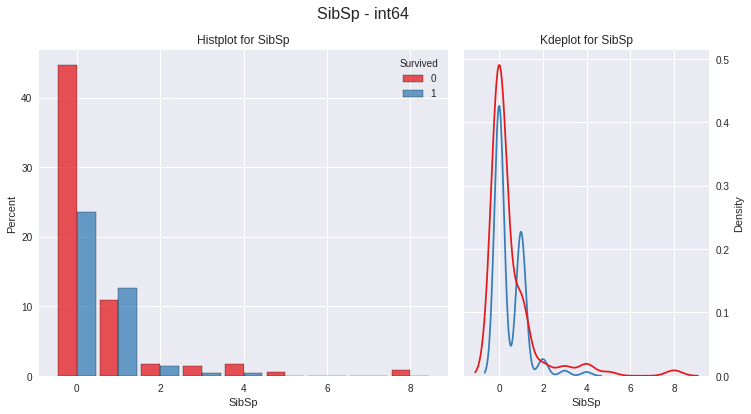

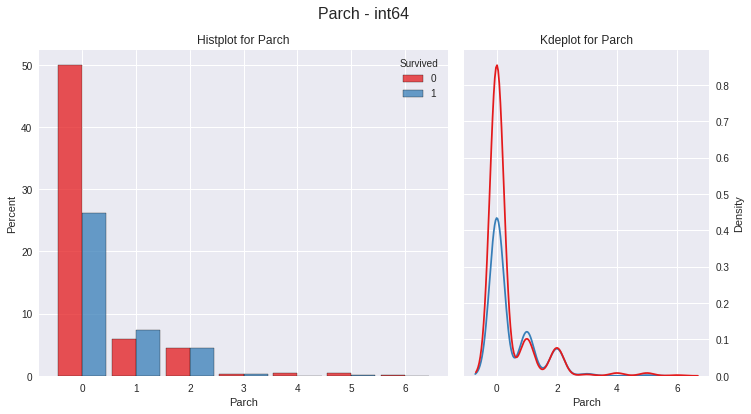

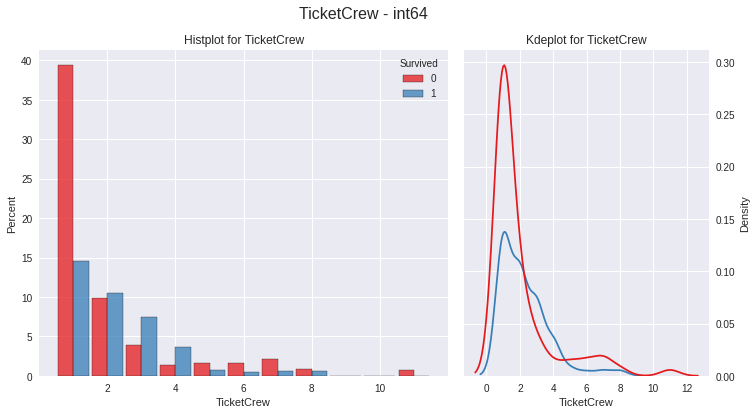

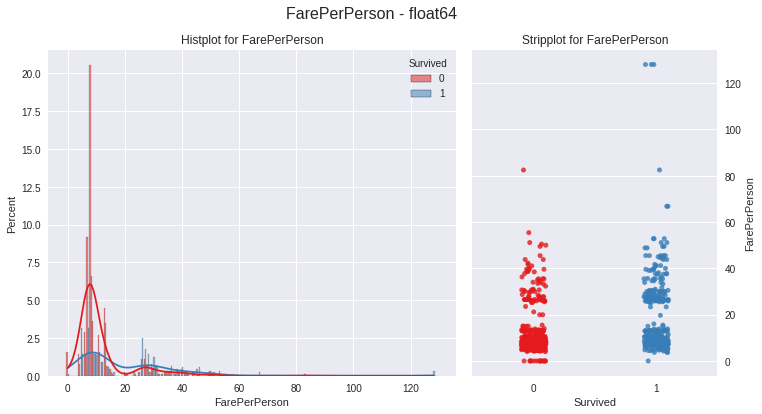

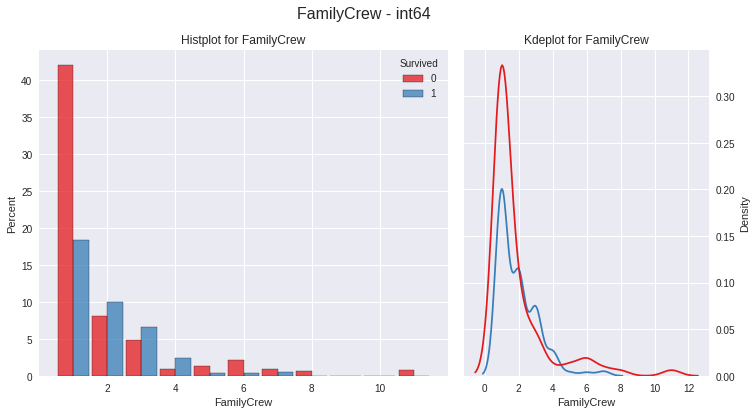

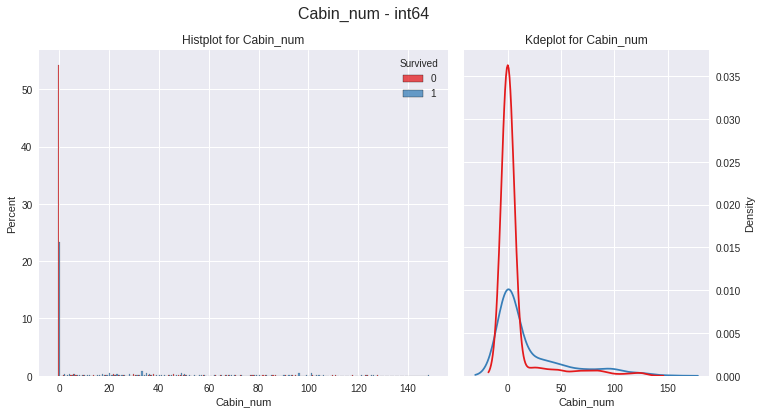

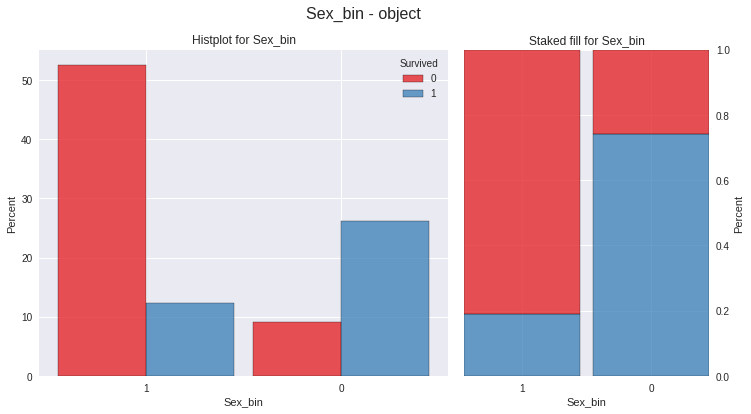

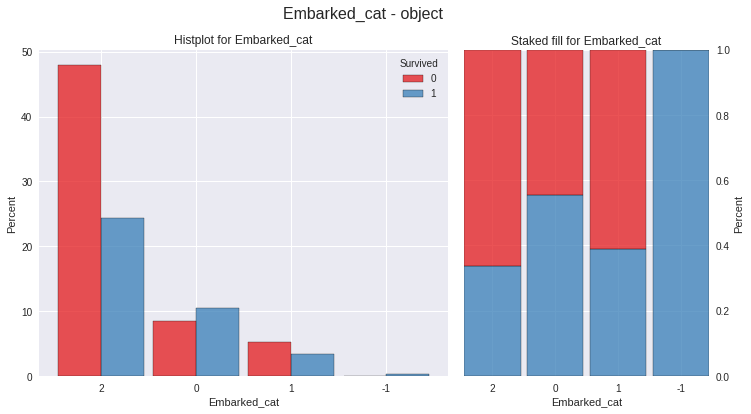

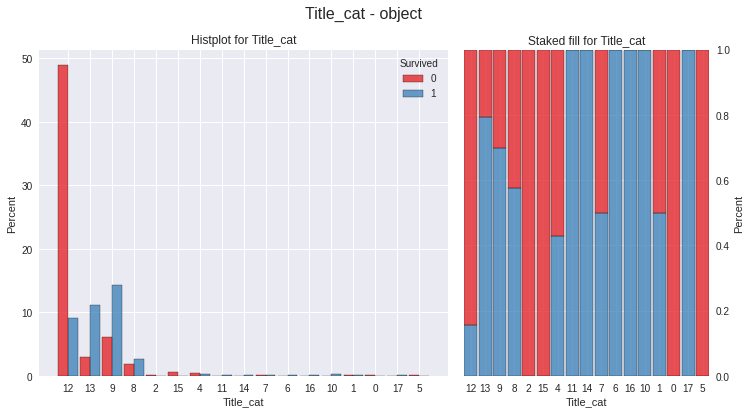

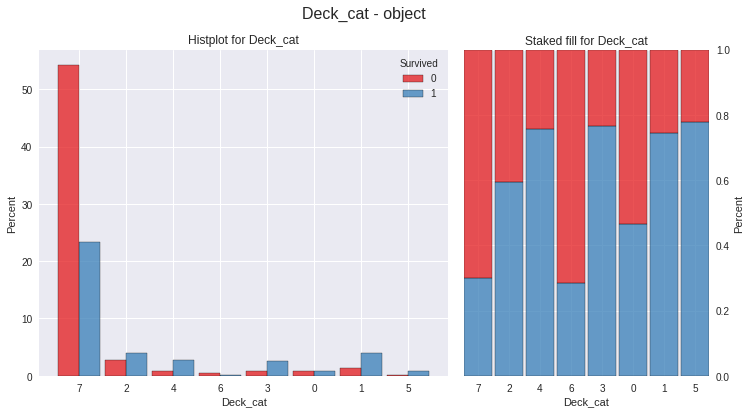

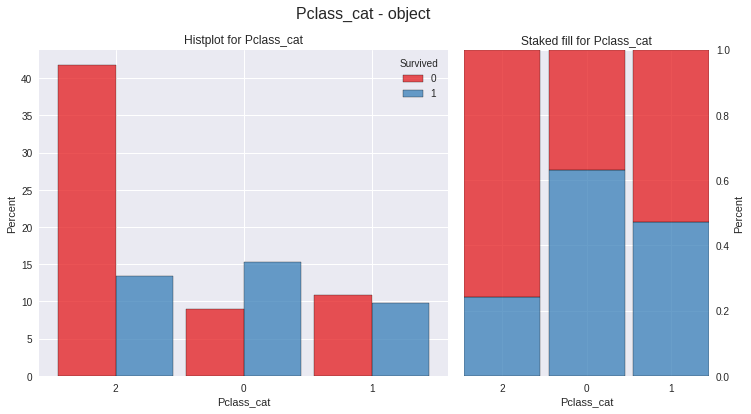

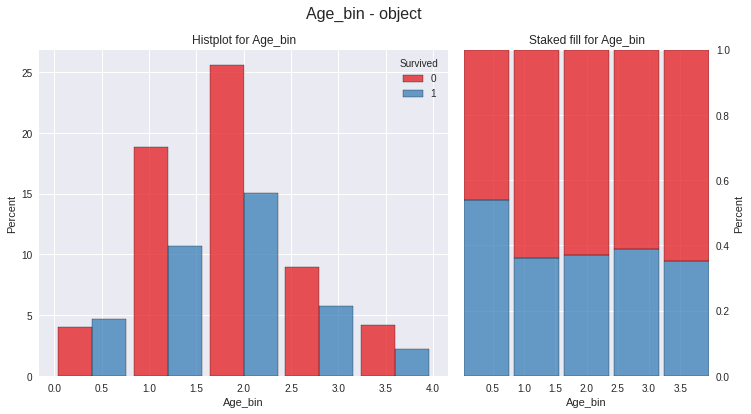

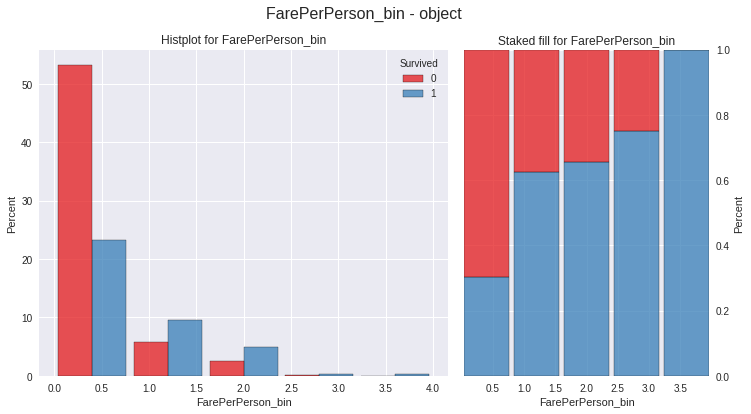

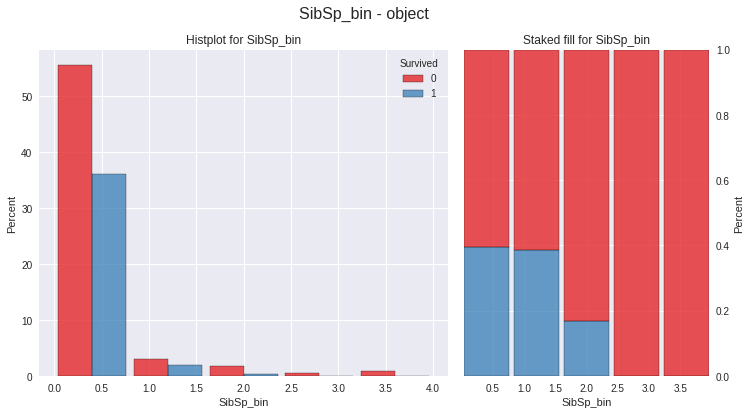

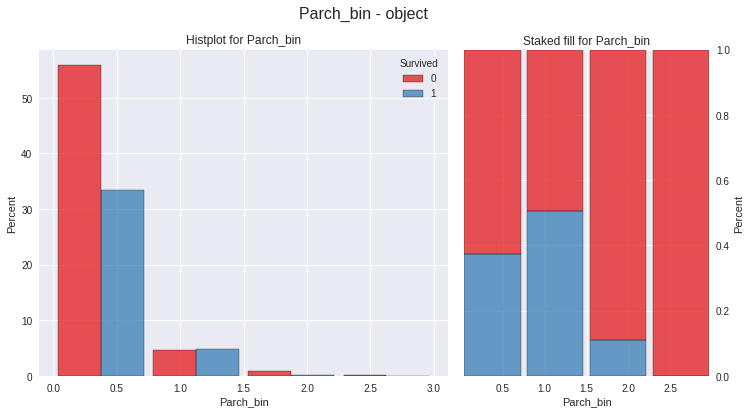

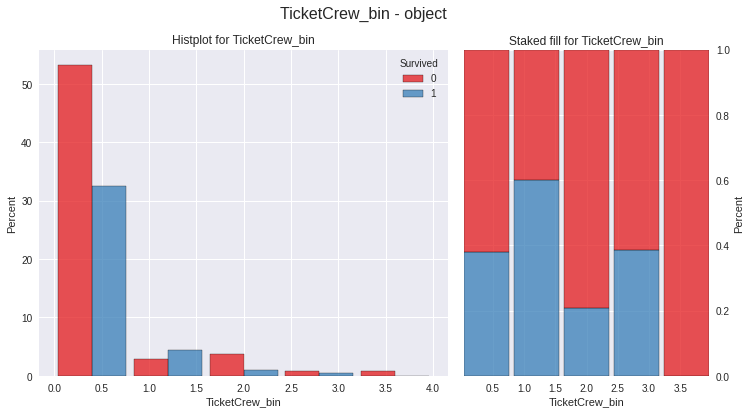

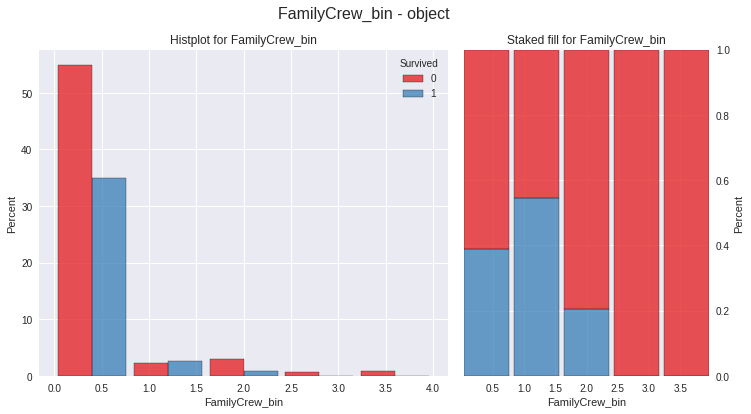

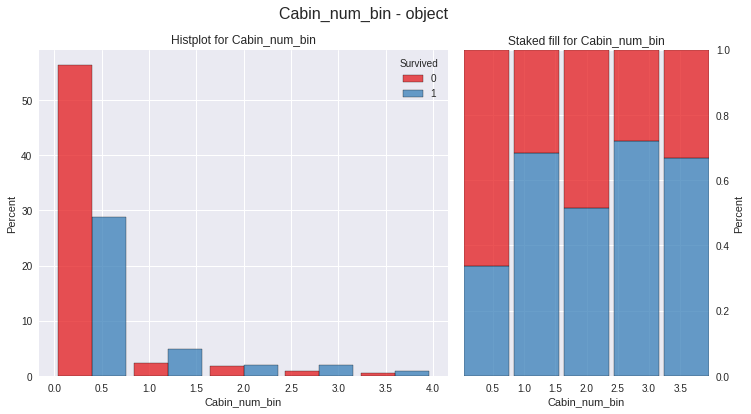

In [ ]:
# aggiungere a fianco il fill

for series in train_01.columns:
  if series != 'PassengerId' and series != 'Survived':
    if train_01[series].dtype == object:
      fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), gridspec_kw= {"width_ratios":(1,0.6)})
      # axes.set_title(f'{series} - {train_01[series].dtype}')
      sns.histplot( data=train_01, x=series, hue="Survived", multiple="dodge", palette="Set1",
                   stat="percent", shrink=.9, bins=(train_01[series].nunique()), ax=ax1)
      sns.histplot( data=train_01, x=series, hue="Survived", multiple="fill", palette="Set1",
                   stat="percent", shrink=.9, bins=(train_01[series].nunique()), ax=ax2)
      fig.suptitle(f'{series} - {train_01[series].dtype}', fontsize=16)
      ax1.set_title(f'Histplot for {series}', fontsize=12)
      ax2.set_title(f'Staked fill for {series}', fontsize=12)
      ax2.yaxis.tick_right()
      ax2.yaxis.set_label_position("right")
      ax2.legend('')
      plt.subplots_adjust(wspace=0.05)
      plt.show()
      print()
      print()
      print()
    elif train_01[series].dtype == float:
      fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), gridspec_kw= {"width_ratios":(1,0.6)})
      # axes.set_title(f'{series} - {train_01[series].dtype}')
      sns.histplot( data=train_01, x=series, hue="Survived", multiple="dodge", palette="Set1",
                   stat="percent", common_norm=True, discrete=True, kde=True, shrink=.9, ax=ax1)
      sns.stripplot( data=train_01, x="Survived", y=series, jitter = True, alpha=0.8, palette="Set1", ax=ax2)
      # sns.swarmplot('Survived', series, data=train_01, alpha=0.6, palette="Set1", ax=ax2)
      fig.suptitle(f'{series} - {train_01[series].dtype}', fontsize=16)
      ax1.set_title(f'Histplot for {series}', fontsize=12)
      ax2.set_title(f'Stripplot for {series}', fontsize=12)
      ax2.yaxis.tick_right()
      ax2.yaxis.set_label_position("right")
      ax2.legend('')
      plt.subplots_adjust(wspace=0.05)
      plt.show()
      print()
      print()
      print()
    elif train_01[series].dtype == int:
      fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), gridspec_kw= {"width_ratios":(1,0.6)})
      # axes.set_title(f'{series} - {train_01[series].dtype}')
      sns.histplot( data=train_01, x=series, hue="Survived", multiple="dodge", palette="Set1",
                   stat="percent", common_norm=True, discrete=True, shrink=.9, ax=ax1)
      sns.kdeplot(data=train_01, x=series, hue="Survived", palette="Set1", ax=ax2)
      # sns.stripplot( data=train_01, x="Survived", y=series, jitter = True, alpha=0.8, palette="Set1", ax=ax2)
      # sns.swarmplot('Survived', series, data=train_01, alpha=0.6, palette="Set1", ax=ax2)
      fig.suptitle(f'{series} - {train_01[series].dtype}', fontsize=16)
      ax1.set_title(f'Histplot for {series}', fontsize=12)
      ax2.set_title(f'Kdeplot for {series}', fontsize=12)
      ax2.yaxis.tick_right()
      ax2.yaxis.set_label_position("right")
      ax2.legend('')
      plt.subplots_adjust(wspace=0.05)
      plt.show()
      print()
      print()
      print()

In [ ]:
info(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 21 
 891 
 891 
 0 
 0 
 891 
 563.57 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 PassengerId 
 object 
 891 
 0 
 891 
 1 
 1 
 1 
 3 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Age_bin 
 object 
 891 
 0 
 5 
 2 
 362 
 1 
 1 
 
 
 FarePerPerson_bin 
 object 
 891 
 0 
 5 
 0 
 681 
 1 
 1 
 
 
 SibSp_bin 
 object 
 891 
 0 
 5 
 0 
 817 
 1 
 1 
 
 
 Parch_bin 
 object 
 891 
 0 
 4 
 0 
 796 
 1 
 1 
 
 
 TicketCrew_bin 
 object 
 891 
 0 
 5 
 0 
 763 
 1 
 1 
 
 
 FamilyCrew_bin 
 object 
 891 
 0 
 5 
 0 
 800 
 1 
 1 
 
 
 Cabin_num_bin 
 object 
 891 
 0 
 5 
 0 
 758 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Age_bin 
 FarePerPerson_bin 
 SibSp_bin 
 Parch_bin 
 TicketCrew_bin 
 FamilyCrew_bin 
 Cabin_num_bin 
 Survived 
 
 
 
 
 90 
 91 
 29.0 
 0 
 0 
 1 
 8.050 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 508 
 509 
 28.0 
 0 
 0 
 3 
 7.508 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 161 
 162 
 40.0 
 0 
 0 
 2 
 7.875 
 1 
 0 
 0 
 2 
 13 
 7 
 1 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 1

In [ ]:
info(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 21 
 891 
 891 
 0 
 0 
 891 
 563.57 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 PassengerId 
 object 
 891 
 0 
 891 
 1 
 1 
 1 
 3 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Age_bin 
 object 
 891 
 0 
 5 
 2 
 362 
 1 
 1 
 
 
 FarePerPerson_bin 
 object 
 891 
 0 
 5 
 0 
 681 
 1 
 1 
 
 
 SibSp_bin 
 object 
 891 
 0 
 5 
 0 
 817 
 1 
 1 
 
 
 Parch_bin 
 object 
 891 
 0 
 4 
 0 
 796 
 1 
 1 
 
 
 TicketCrew_bin 
 object 
 891 
 0 
 5 
 0 
 763 
 1 
 1 
 
 
 FamilyCrew_bin 
 object 
 891 
 0 
 5 
 0 
 800 
 1 
 1 
 
 
 Cabin_num_bin 
 object 
 891 
 0 
 5 
 0 
 758 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Age_bin 
 FarePerPerson_bin 
 SibSp_bin 
 Parch_bin 
 TicketCrew_bin 
 FamilyCrew_bin 
 Cabin_num_bin 
 Survived 
 
 
 
 
 182 
 183 
 9.0 
 4 
 2 
 7 
 4.484 
 7 
 0 
 1 
 2 
 8 
 7 
 2 
 0 
 0 
 2 
 1 
 2 
 2 
 0 
 0 
 
 
 332 
 333 
 38.0 
 0 
 1 
 3 
 51.154 
 2 
 91 
 1 
 2 
 12 
 2 
 0 
 3 
 2 
 0 
 0 
 0 
 0 
 3 
 0 
 
 
 863 
 864 
 4.4 
 8 
 2 
 11 
 6.323 
 11 
 0 
 0 
 2 
 9 
 7 
 2 
 0 
 0 
 4 
 1 
 4 
 4 
 0 
 0

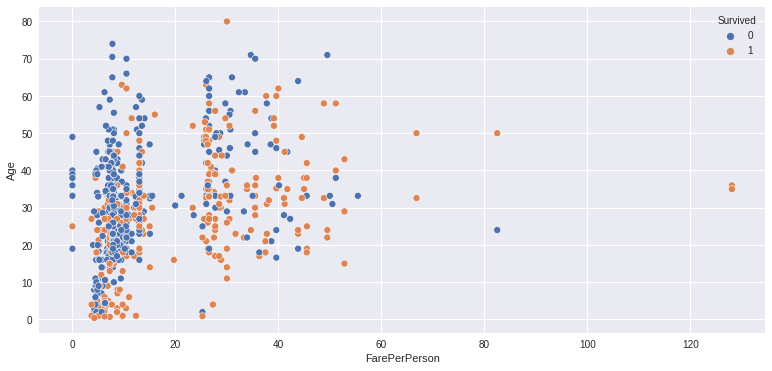

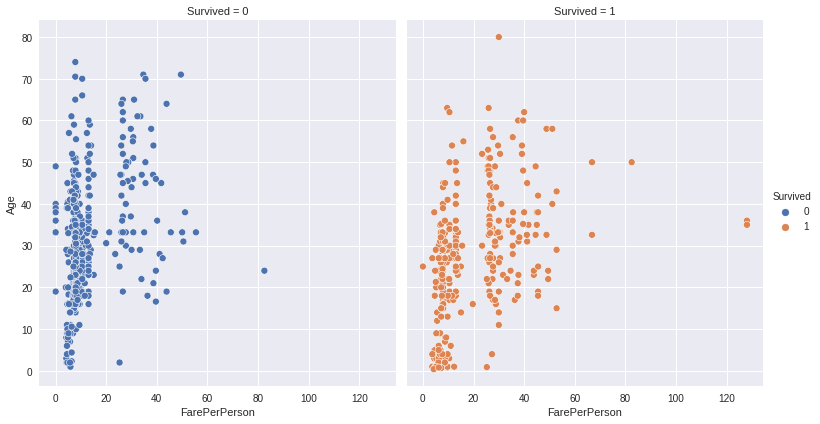

In [ ]:
fig, axes = plt.subplots(figsize=(13,6))
# axes.set_title(f'{series} - {train_01[series].dtype}')
sns.scatterplot(data=train_01, x="FarePerPerson", y="Age", hue="Survived", palette="deep", ax=axes)
sns.relplot(data=train_01, x="FarePerPerson", y="Age", col="Survived", hue="Survived", kind="scatter", palette="deep",height=6, aspect=.9)

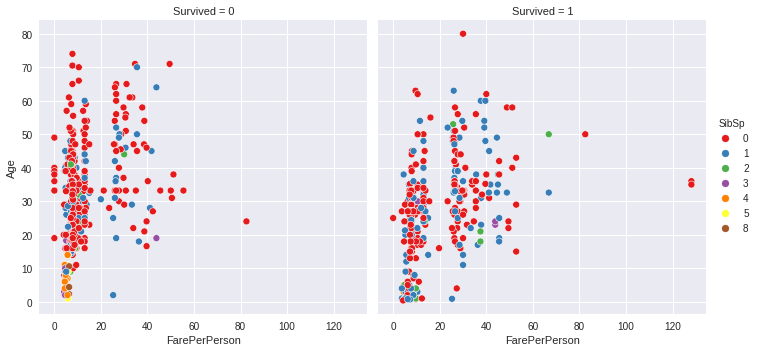

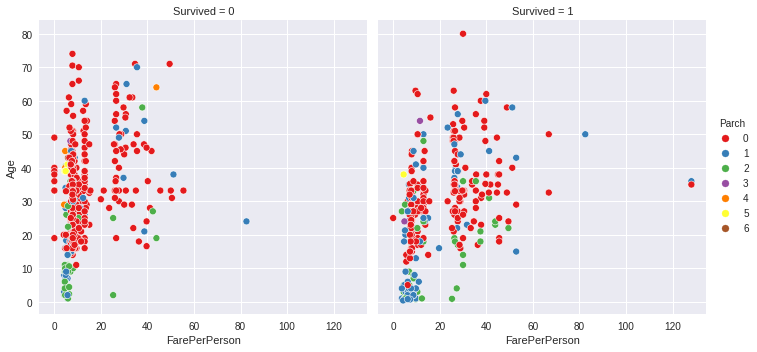

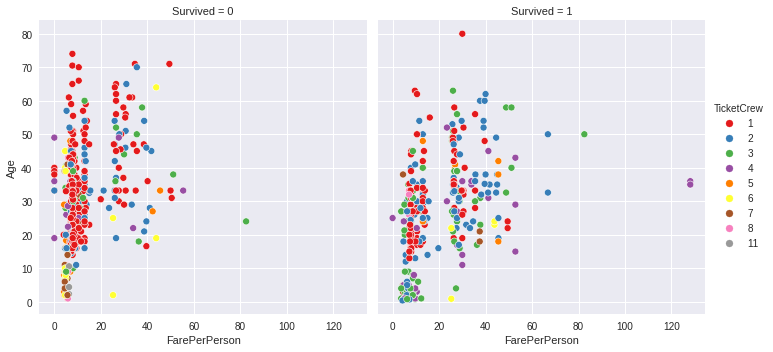

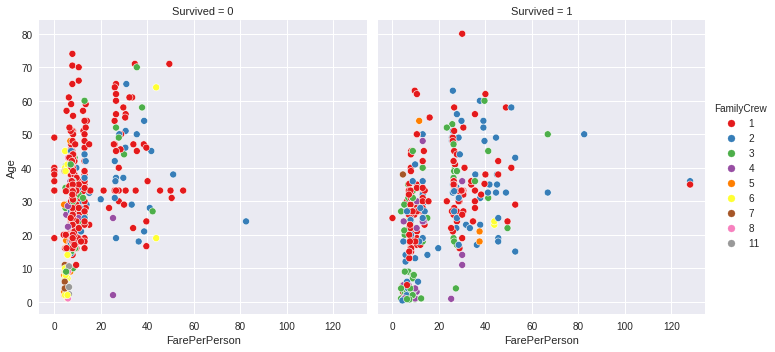

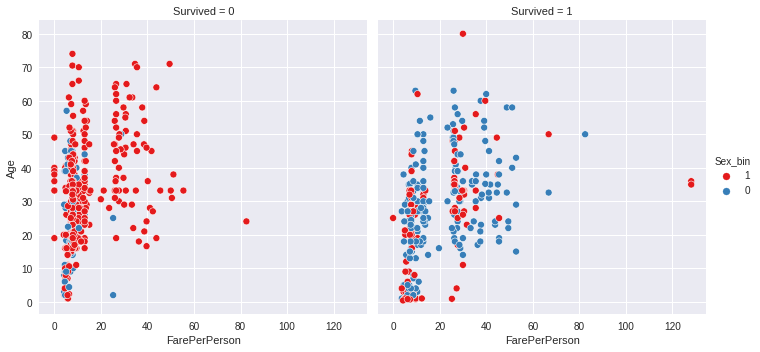

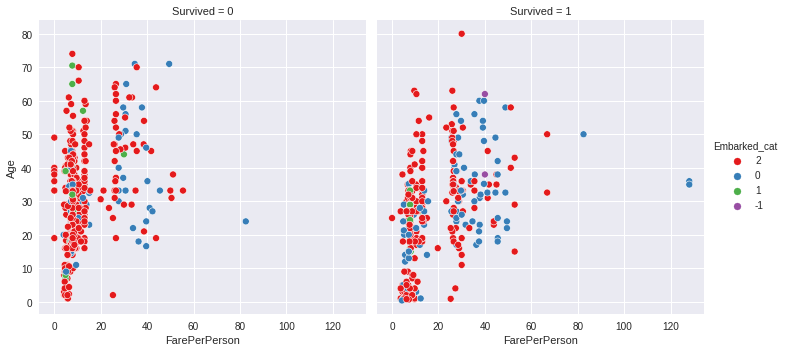

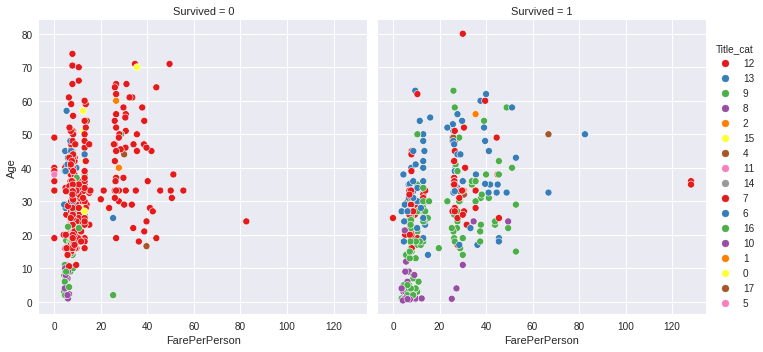

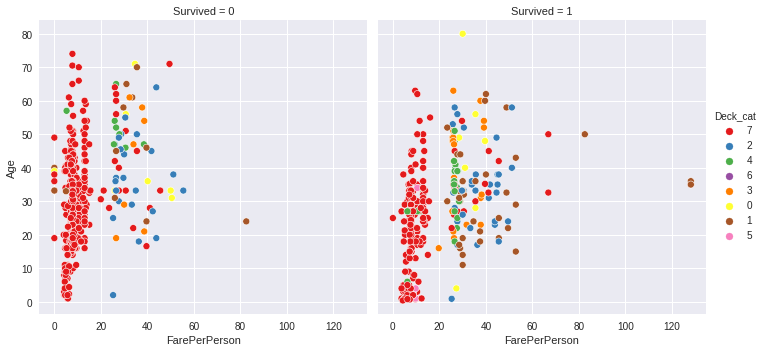

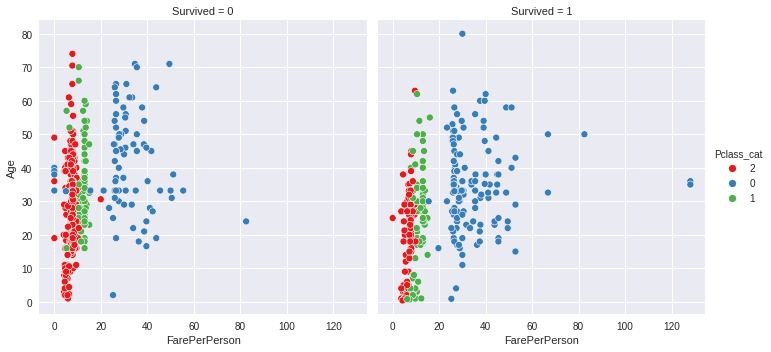

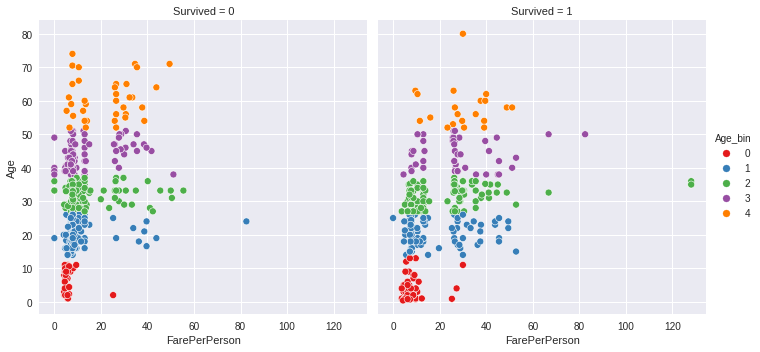

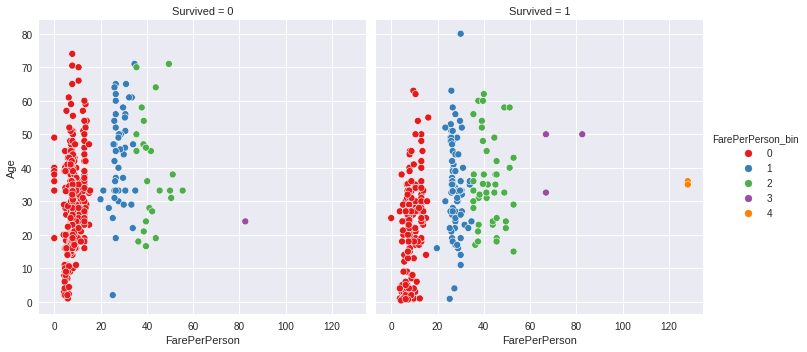

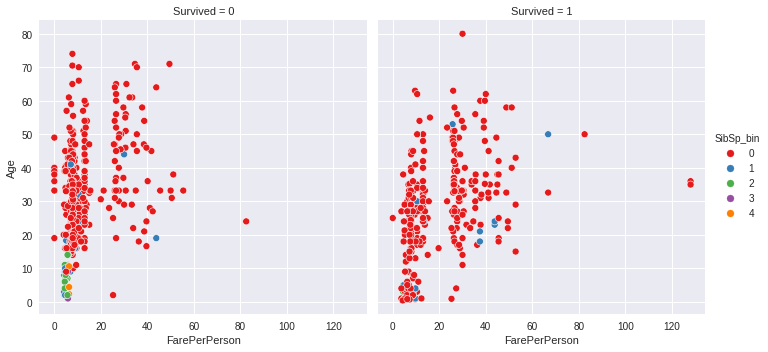

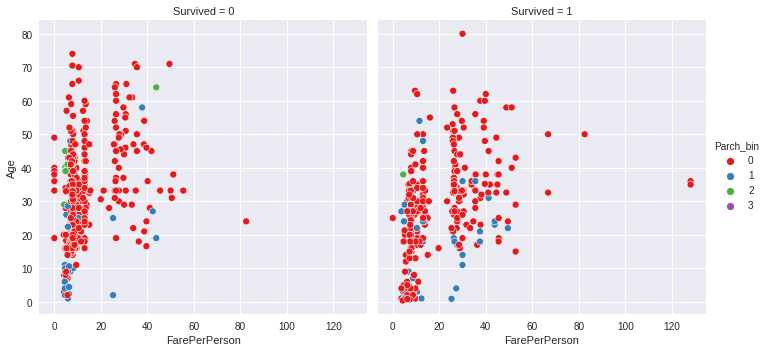

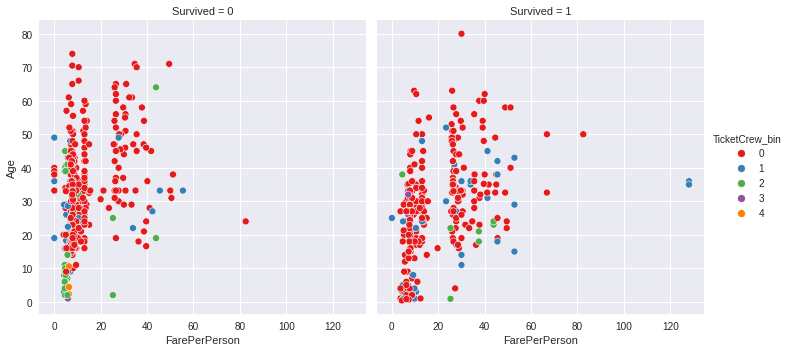

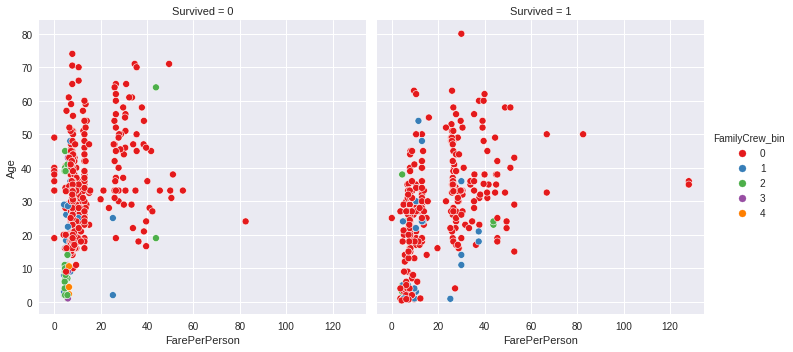

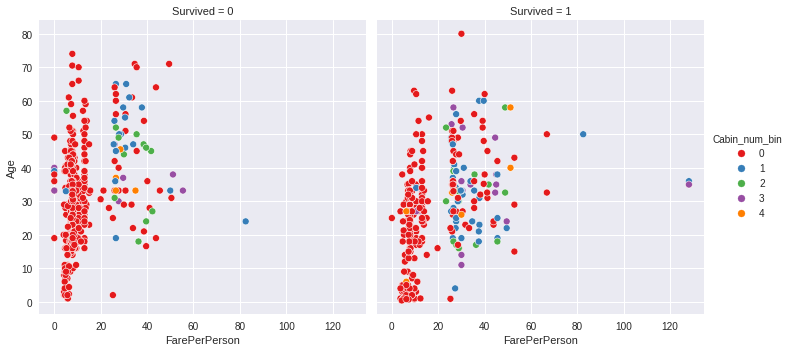

In [ ]:
for series in train_01.columns:
  if train_01[series].dtype == object or  train_01[series].dtype == int:
    if series != 'PassengerId' and series != 'Cabin_num' and series != 'Survived':
      sns.relplot(data=train_01, x="FarePerPerson", y="Age", col="Survived", hue=series, kind="scatter", palette="Set1")

In [ ]:
# aggiungere a fianco il fill

for series in train_01.columns:
  for i in train_01.columns:
    if train_01[i].dtype == float:
      if series != 'PassengerId' and series != 'Survived' and series != 'Cabin_num':
        if (train_01[series].dtype == object) or (train_01[series].dtype == int):
          fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6), gridspec_kw= {"width_ratios":(1,0.7)})
          # axes.set_title(f'{series} - {train_01[series].dtype}')
          sns.boxplot( data=train_01, x="Survived", y=i, hue=series, palette="Set1", ax=ax1)
          sns.swarmplot(x=series, y=i, hue="Survived", data=train_01, alpha=0.7, palette="Set1", ax=ax2)
          # sns.stripplot(x=series, y=i, hue="Survived", data=train_01, alpha=0.7, palette="Set1", ax=ax2)
          fig.suptitle(f'{i}/{series}({train_01[series].dtype})', fontsize=16)
          ax1.set_title(f'Boxplot for {series}', fontsize=12)
          ax2.set_title(f'Swarmplot for {series}', fontsize=12)
          ax2.yaxis.tick_right()
          ax2.yaxis.set_label_position("right")
          plt.subplots_adjust(wspace=0.05)
          plt.show()
          print()
          print()
          print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
info(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 21 
 891 
 891 
 0 
 0 
 891 
 563.57 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 PassengerId 
 object 
 891 
 0 
 891 
 1 
 1 
 1 
 3 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Age_bin 
 object 
 891 
 0 
 5 
 2 
 362 
 1 
 1 
 
 
 FarePerPerson_bin 
 object 
 891 
 0 
 5 
 0 
 681 
 1 
 1 
 
 
 SibSp_bin 
 object 
 891 
 0 
 5 
 0 
 817 
 1 
 1 
 
 
 Parch_bin 
 object 
 891 
 0 
 4 
 0 
 796 
 1 
 1 
 
 
 TicketCrew_bin 
 object 
 891 
 0 
 5 
 0 
 763 
 1 
 1 
 
 
 FamilyCrew_bin 
 object 
 891 
 0 
 5 
 0 
 800 
 1 
 1 
 
 
 Cabin_num_bin 
 object 
 891 
 0 
 5 
 0 
 758 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Age_bin 
 FarePerPerson_bin 
 SibSp_bin 
 Parch_bin 
 TicketCrew_bin 
 FamilyCrew_bin 
 Cabin_num_bin 
 Survived 
 
 
 
 
 131 
 132 
 20.0 
 0 
 0 
 1 
 7.050 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 384 
 385 
 33.2 
 0 
 0 
 1 
 7.896 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 137 
 138 
 37.0 
 1 
 0 
 2 
 26.550 
 2 
 123 
 1 
 2 
 12 
 2 
 0 
 2 
 1 
 0 
 0 
 0 
 0 
 4 
 0

##Predictive Modeling

###Separe test and train

In [ ]:
yAll = train_01["Survived"].astype(int)
xAll = train_01.drop("Survived", axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(xAll,yAll,
                                    test_size = 0.3, 
                                    random_state = 42,
                                    stratify=yAll, # stratify uses yAll information to obtain proportionally distributed subsets  
                               )

print(f'xAll.shape: {xAll.shape} and yAll.shape: {yAll.shape}')
print(f'xTrain.shape: {xTrain.shape} and xTest.shape: {xTest.shape}')
print(f'yTrain.shape: {yTrain.shape} and yTest.shape: {yTest.shape}')

xAll.shape: (891, 20) and yAll.shape: (891,)
xTrain.shape: (623, 20) and xTest.shape: (268, 20)
yTrain.shape: (623,) and yTest.shape: (268,)


In [ ]:
xTrain.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
       'FamilyCrew', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat', 'Age_bin', 'FarePerPerson_bin', 'SibSp_bin',
       'Parch_bin', 'TicketCrew_bin', 'FamilyCrew_bin', 'Cabin_num_bin'],
      dtype='object')

In [ ]:
# Which features to choose?
## all feat
col_00 = ['Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
       'FamilyCrew', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat', 'TicketCrew_bin', 'FamilyCrew_bin',
       'Cabin_num_bin', 'SibSp_bin', 'Parch_bin', 'Age_bin',
       'FarePerPerson_bin']

## all feat p-value > 0.005 in all test
col_01 = ['FarePerPerson', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat', 'TicketCrew_bin', 'FamilyCrew_bin',
       'Cabin_num_bin', 'SibSp_bin', 'Parch_bin',
       'FarePerPerson_bin']
       
## all feat p-value > 0.005 escludendo quelle fortemente correlate tra loro e lasciando solo quella più discriminante
col_02 = ['FarePerPerson', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat', 'TicketCrew_bin',
       'Cabin_num_bin',
       'FarePerPerson_bin']

## all feat p-value > 0.005 + quelle più discriminante
col_03 = ['FarePerPerson', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Pclass_cat', 'TicketCrew_bin',
       'FarePerPerson_bin']


## feat a intuito
col_04 = ['FarePerPerson', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat', 'TicketCrew_bin',
       'FarePerPerson_bin']

col_05 = ['Age', 'Sex_bin', 'Title_cat', 'Pclass_cat', 'Parch']

col_06 = ['Age', 'Sex_bin', 'Title_cat', 'Pclass_cat']


###Decision Tree

In [ ]:
%%time

clf_0 = tree.DecisionTreeClassifier()
clf_0 = clf_0.fit(xTrain[col_00], yTrain)
yPred_train = clf_0.predict(xTrain[col_00])
yPred_test = clf_0.predict(xTest[col_00])
clf_0_train = classification_report(yTrain, yPred_train)
clf_0_test = classification_report(yTest, yPred_test)
print("Train")
print(clf_0_train)
print()
print("Test")
print(clf_0_test)

Train
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       384
           1       1.00      0.97      0.98       239

    accuracy                           0.99       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.99      0.99      0.99       623


Test
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       165
           1       0.74      0.64      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268

CPU times: user 25.3 ms, sys: 3.97 ms, total: 29.3 ms
Wall time: 29.5 ms


In [ ]:
%%time

#################### WARNING: RUN TIME ABOUT 40 MIN


clsf = DecisionTreeClassifier()
max_depth_range=range(1, 20)
min_samples_leaf_range=range(1, 50)
min_samples_split_range=range(2,10)
 
paramSpace = {
    'criterion': ['entropy', 'gini'], 
    'max_depth': max_depth_range,
    'min_samples_leaf': min_samples_leaf_range,
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'min_samples_split': min_samples_split_range
}

scoringMetric = make_scorer(accuracy_score)

# make_scorer(precision_score)
# make_scorer(recall_score)


gs_col_00 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_01 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_02 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_03 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_04 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_05 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs_col_06 = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)

gs_col_00.fit(xTrain[col_00],yTrain)
gs_col_01.fit(xTrain[col_01],yTrain)
gs_col_02.fit(xTrain[col_02],yTrain)
gs_col_03.fit(xTrain[col_03],yTrain)
gs_col_04.fit(xTrain[col_04],yTrain)
gs_col_05.fit(xTrain[col_05],yTrain)
gs_col_06.fit(xTrain[col_05],yTrain)
print('gs_col_00')
print(gs_col_00.best_params_)
print(gs_col_00.best_score_)
print()
print('gs_col_01')
print(gs_col_01.best_params_)
print(gs_col_01.best_score_)
print()
print('gs_col_02')
print(gs_col_02.best_params_)
print(gs_col_02.best_score_)
print()
print('gs_col_03')
print(gs_col_03.best_params_)
print(gs_col_03.best_score_)
print()
print('gs_col_04')
print(gs_col_04.best_params_)
print(gs_col_04.best_score_)
print()
print('gs_col_05')
print(gs_col_05.best_params_)
print(gs_col_05.best_score_)
print()
print('gs_col_06')
print(gs_col_06.best_params_)
print(gs_col_06.best_score_)
print()

```sh
gs_col_00
{'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3}
0.8377935483870967

gs_col_01
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4}
0.8362451612903227

gs_col_02
{'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6}
0.8362064516129033

gs_col_03
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 3}
0.8218322580645161

gs_col_04
{'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 7}
0.8298322580645161

gs_col_05
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 11, 'min_samples_split': 9}
0.8233935483870967

gs_col_06
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 8}
0.8233032258064517

CPU times: user 3h 13min 56s, sys: 13.7 s, total: 3h 14min 10s
Wall time: 3h 14min 11s
```

In [ ]:
%%time

clsf_00 =  DecisionTreeClassifier(criterion = 'entropy', max_depth= 11, max_features= 'log2', min_samples_leaf= 6, min_samples_split= 3)
clsf_00.fit(xTrain[col_00],yTrain)
yPred_train = clsf_00.predict(xTrain[col_00])
yPred_test = clsf_00.predict(xTest[col_00])
clf_00_train = classification_report(yTrain, yPred_train)
clf_00_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_00_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_00_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       384
           1       0.87      0.76      0.81       239

    accuracy                           0.86       623
   macro avg       0.87      0.84      0.85       623
weighted avg       0.86      0.86      0.86       623

ASE (RMSE)
0.36937324904594054
ASE (MSE)
0.13643659711075443


TEST
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       165
           1       0.77      0.68      0.72       103

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

ASE (RMSE)
0.4488792012484348
ASE (MSE)
0.20149253731343283


CPU times: user 27.9 ms, sys: 61 µs, total: 27.9 ms
Wall time: 26.6 ms


ROC


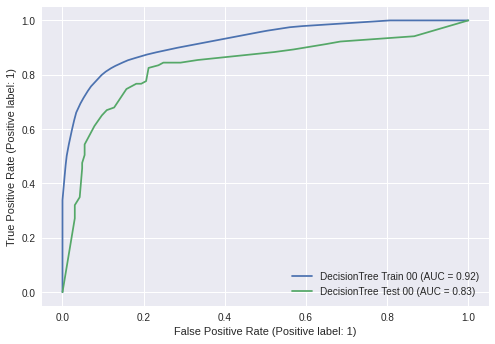

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_00, xTrain[col_00], yTrain, name='DecisionTree Train 00');
plot_roc_curve(clsf_00, xTest[col_00], yTest, ax=disp.ax_, name='DecisionTree Test 00');

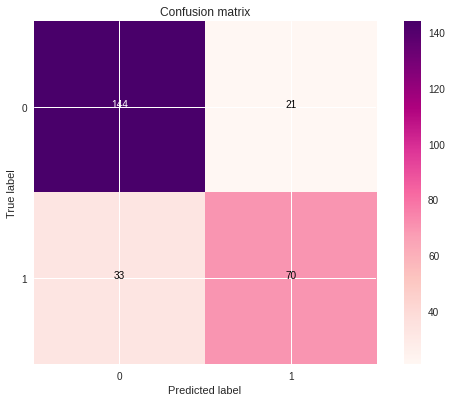

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_01 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 9)
clsf_01.fit(xTrain[col_01],yTrain)
yPred_train = clsf_01.predict(xTrain[col_01])
yPred_test = clsf_01.predict(xTest[col_01])
clf_01_train = classification_report(yTrain, yPred_train)
clf_01_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_01_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_01_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       384
           1       0.87      0.64      0.74       239

    accuracy                           0.83       623
   macro avg       0.84      0.79      0.80       623
weighted avg       0.83      0.83      0.82       623

ASE (RMSE)
0.41828204789242995
ASE (MSE)
0.17495987158908508


TEST
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       165
           1       0.93      0.62      0.74       103

    accuracy                           0.84       268
   macro avg       0.87      0.80      0.81       268
weighted avg       0.85      0.84      0.83       268

ASE (RMSE)
0.4051902077760665
ASE (MSE)
0.16417910447761194


CPU times: user 20.8 ms, sys: 1.07 ms, total: 21.9 ms
Wall time: 20.9 ms


ROC


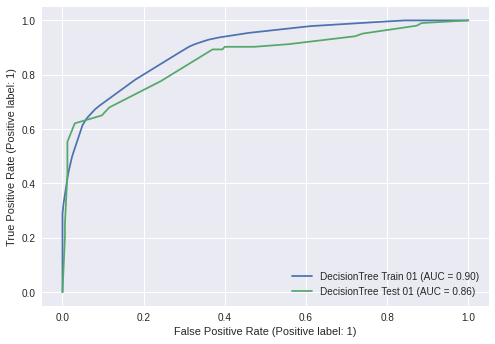

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_01, xTrain[col_01], yTrain, name='DecisionTree Train 01');
plot_roc_curve(clsf_01, xTest[col_01], yTest, ax=disp.ax_, name='DecisionTree Test 01');

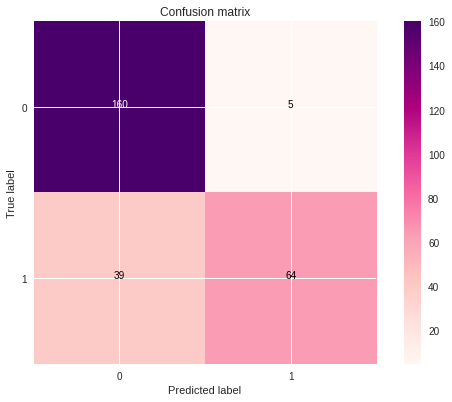

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_02 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 18, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 6)
clsf_02.fit(xTrain[col_02],yTrain)
yPred_train = clsf_02.predict(xTrain[col_02])
yPred_test = clsf_02.predict(xTest[col_02])
clf_02_train = classification_report(yTrain, yPred_train)
clf_02_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_02_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_02_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       384
           1       0.79      0.77      0.78       239

    accuracy                           0.83       623
   macro avg       0.82      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623

ASE (RMSE)
0.41053541362798
ASE (MSE)
0.16853932584269662


TEST
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       165
           1       0.74      0.75      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

ASE (RMSE)
0.4447034900131218
ASE (MSE)
0.19776119402985073


CPU times: user 31.9 ms, sys: 990 µs, total: 32.8 ms
Wall time: 36.5 ms


ROC


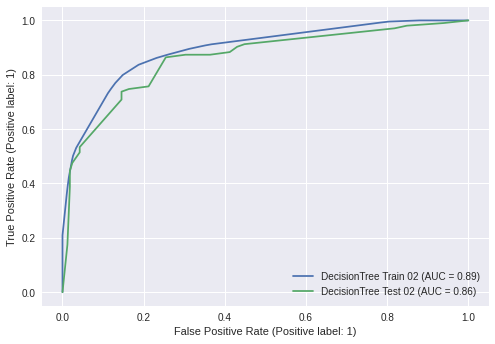

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_02, xTrain[col_02], yTrain, name='DecisionTree Train 02');
plot_roc_curve(clsf_02, xTest[col_02], yTest, ax=disp.ax_, name='DecisionTree Test 02');

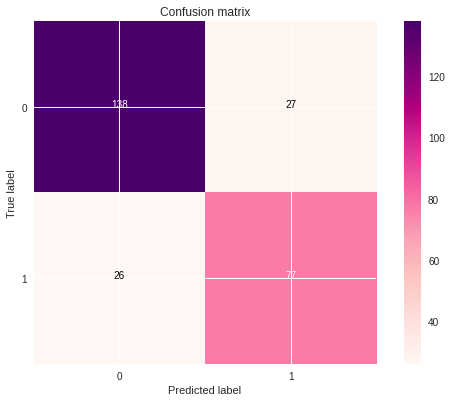

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_03 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 5)
clsf_03.fit(xTrain[col_03],yTrain)
yPred_train = clsf_03.predict(xTrain[col_03])
yPred_test = clsf_03.predict(xTest[col_03])
clf_03_train = classification_report(yTrain, yPred_train)
clf_03_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_03_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_03_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       384
           1       0.90      0.75      0.82       239

    accuracy                           0.87       623
   macro avg       0.88      0.85      0.86       623
weighted avg       0.87      0.87      0.87       623

ASE (RMSE)
0.3583446873162331
ASE (MSE)
0.12841091492776885


TEST
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       165
           1       0.73      0.61      0.67       103

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

ASE (RMSE)
0.48484495136659067
ASE (MSE)
0.23507462686567165


CPU times: user 17.9 ms, sys: 991 µs, total: 18.9 ms
Wall time: 18.3 ms


ROC


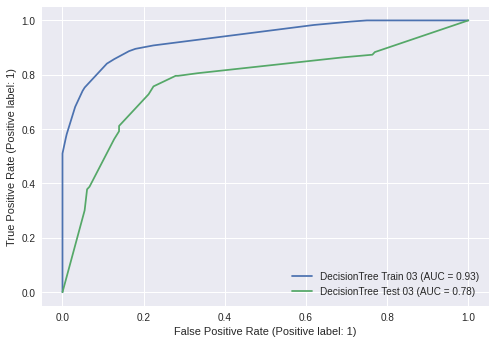

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_03, xTrain[col_03], yTrain, name='DecisionTree Train 03');
plot_roc_curve(clsf_03, xTest[col_03], yTest, ax=disp.ax_, name='DecisionTree Test 03');

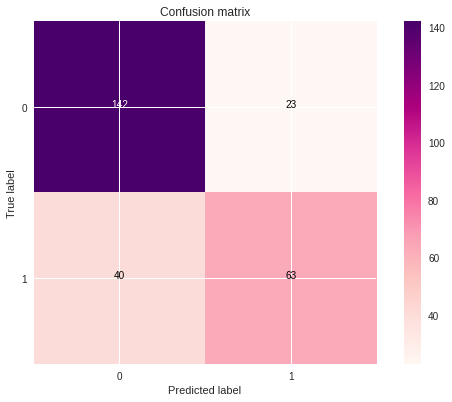

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_04 =  DecisionTreeClassifier(criterion= 'entropy', max_depth=16, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 4)
clsf_04.fit(xTrain[col_04],yTrain)
yPred_train = clsf_04.predict(xTrain[col_04])
yPred_test = clsf_04.predict(xTest[col_04])
clf_04_train = classification_report(yTrain, yPred_train)
clf_04_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_04_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_04_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       384
           1       0.86      0.72      0.79       239

    accuracy                           0.85       623
   macro avg       0.85      0.82      0.83       623
weighted avg       0.85      0.85      0.85       623

ASE (RMSE)
0.3884363848046787
ASE (MSE)
0.1508828250401284


TEST
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       165
           1       0.82      0.73      0.77       103

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

ASE (RMSE)
0.4097687735311148
ASE (MSE)
0.16791044776119404


CPU times: user 20.6 ms, sys: 0 ns, total: 20.6 ms
Wall time: 20.7 ms


ROC


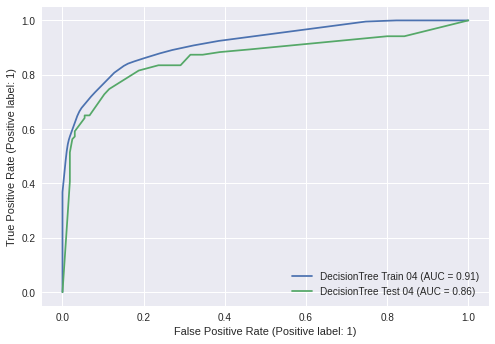

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_04, xTrain[col_04], yTrain, name='DecisionTree Train 04');
plot_roc_curve(clsf_04, xTest[col_04], yTest, ax=disp.ax_, name='DecisionTree Test 04');

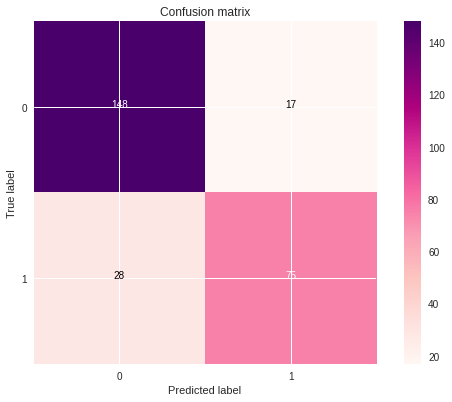

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_05 =  DecisionTreeClassifier(criterion= 'gini', max_depth=6, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 4)
clsf_05.fit(xTrain[col_05],yTrain)
yPred_train = clsf_05.predict(xTrain[col_05])
yPred_test = clsf_05.predict(xTest[col_05])
clf_05_train = classification_report(yTrain, yPred_train)
clf_05_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_05_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_05_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       384
           1       0.84      0.69      0.76       239

    accuracy                           0.83       623
   macro avg       0.83      0.80      0.81       623
weighted avg       0.83      0.83      0.83       623

ASE (RMSE)
0.41248571160622494
ASE (MSE)
0.17014446227929375


TEST
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       165
           1       0.75      0.65      0.70       103

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268

ASE (RMSE)
0.46520738434354325
ASE (MSE)
0.21641791044776118


CPU times: user 29.9 ms, sys: 2.13 ms, total: 32 ms
Wall time: 30 ms


ROC


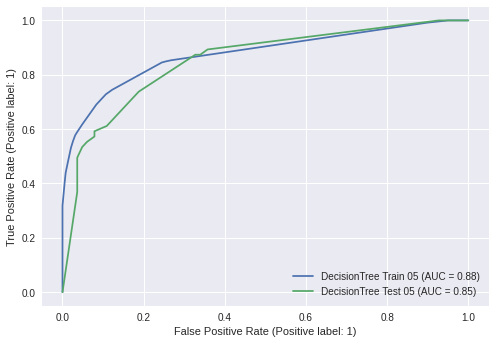

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_05, xTrain[col_05], yTrain, name='DecisionTree Train 05');
plot_roc_curve(clsf_05, xTest[col_05], yTest, ax=disp.ax_, name='DecisionTree Test 05');

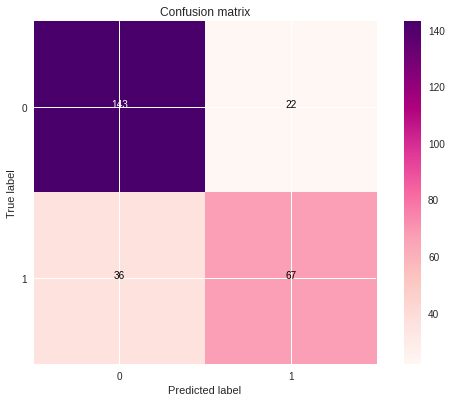

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
%%time

clsf_06 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, max_features=None, min_samples_split=2)
clsf_06.fit(xTrain[col_06],yTrain)
yPred_train = clsf_06.predict(xTrain[col_06])
yPred_test = clsf_06.predict(xTest[col_06])
clf_06_train = classification_report(yTrain, yPred_train)
clf_06_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_06_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_06_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       384
           1       0.80      0.75      0.78       239

    accuracy                           0.83       623
   macro avg       0.83      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623

ASE (RMSE)
0.40857580619280376
ASE (MSE)
0.16693418940609953


TEST
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       165
           1       0.72      0.71      0.72       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

ASE (RMSE)
0.46520738434354325
ASE (MSE)
0.21641791044776118


CPU times: user 19.3 ms, sys: 15 µs, total: 19.3 ms
Wall time: 19.2 ms


ROC


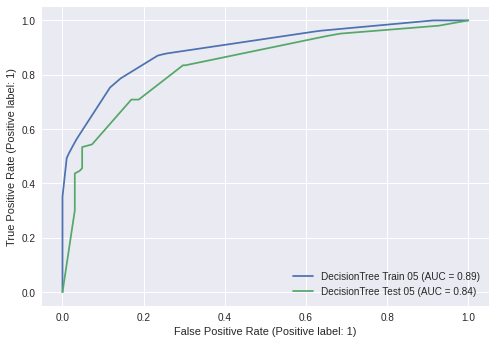

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf_06, xTrain[col_06], yTrain, name='DecisionTree Train 05');
plot_roc_curve(clsf_06, xTest[col_06], yTest, ax=disp.ax_, name='DecisionTree Test 05');

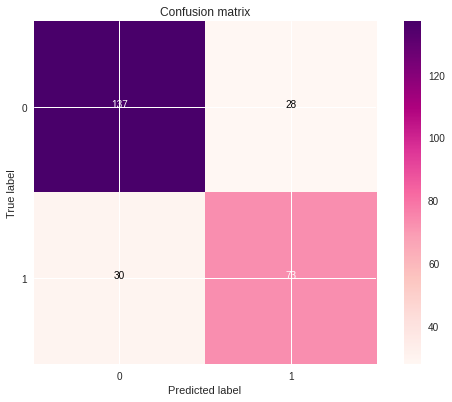

In [ ]:
cm = confusion_matrix(yTest, yPred_test)    
plot_confusion_matrix(cm, ["0","1"])

### Assessment

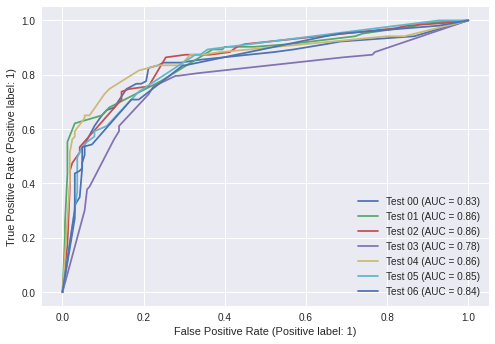

In [ ]:
disp = plot_roc_curve(clsf_00, xTest[col_00], yTest, name='Test 00')
plot_roc_curve(clsf_01, xTest[col_01], yTest, ax=disp.ax_, name='Test 01');
plot_roc_curve(clsf_02, xTest[col_02], yTest, ax=disp.ax_, name='Test 02');
plot_roc_curve(clsf_03, xTest[col_03], yTest, ax=disp.ax_, name='Test 03');
plot_roc_curve(clsf_04, xTest[col_04], yTest, ax=disp.ax_, name='Test 04');
plot_roc_curve(clsf_05, xTest[col_05], yTest, ax=disp.ax_, name='Test 05');
plot_roc_curve(clsf_06, xTest[col_06], yTest, ax=disp.ax_, name='Test 06');

##Submission

In [ ]:
yTrain = train_01["Survived"].astype(int)
xTrain = train_01.drop("Survived", axis=1)
xTest = test_01

print(f'xTrain.shape: {xTrain.shape} and xTest.shape: {xTest.shape}')
print(f'yTrain.shape: {yTrain.shape}')

xTrain.shape: (891, 20) and xTest.shape: (418, 20)
yTrain.shape: (891,)


In [ ]:
%%time

# clsf_00 =  DecisionTreeClassifier(criterion = 'entropy', max_depth= 11, max_features= 'log2', min_samples_leaf= 6, min_samples_split= 3)
# clsf_00.fit(xTrain[col_00],yTrain)
# yPred_test = clsf_00.predict(xTest[col_00])
# score: 0.75119

# clsf_01 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 9)
# clsf_01.fit(xTrain[col_01],yTrain)
# yPred_test = clsf_01.predict(xTest[col_01])
# score: 0.76794

# clsf_02 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 18, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 6)
# clsf_02.fit(xTrain[col_02],yTrain)
# yPred_test = clsf_02.predict(xTest[col_02])
# score: 0.75598

# clsf_03 =  DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 5)
# clsf_03.fit(xTrain[col_03],yTrain)
# yPred_test = clsf_03.predict(xTest[col_03])
# score: 0.75598

# clsf_04 =  DecisionTreeClassifier(criterion= 'entropy', max_depth=16, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 4)
# clsf_04.fit(xTrain[col_04],yTrain)
# yPred_test = clsf_04.predict(xTest[col_04])
# score: 0.75837

# clsf_05 =  DecisionTreeClassifier(criterion= 'gini', max_depth=6, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 4)
# clsf_05.fit(xTrain[col_05],yTrain)
# yPred_test = clsf_05.predict(xTest[col_05])
# score: 0.77033

clsf_06 =  DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, max_features=None, min_samples_split=2)
clsf_06.fit(xTrain[col_06],yTrain)
yPred_train = clsf_06.predict(xTrain[col_06])
yPred_test = clsf_06.predict(xTest[col_06])
clf_06_train = classification_report(yTrain, yPred_train)

print("Train")
print(clf_06_train)

Train
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       549
           1       0.88      0.64      0.74       342

    accuracy                           0.83       891
   macro avg       0.84      0.79      0.81       891
weighted avg       0.84      0.83      0.82       891

CPU times: user 16 ms, sys: 2 ms, total: 18 ms
Wall time: 17.7 ms


Confusion matrix for train


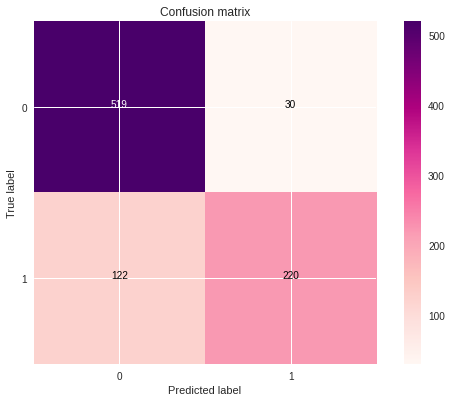

In [ ]:
print("Confusion matrix for train")
cm=confusion_matrix(yTrain, yPred_train)
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
submission = pd.DataFrame({
        "PassengerId": xTest["PassengerId"],
        "Survived": yPred_test
     })
submission.to_csv(f'{staging}/submission_02.csv', index=False)

'''
Submission File Format:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

'''

def local_time():
    # dd/mm/YY H:M:S
    print("Finished at " + datetime.datetime.now().strftime("%H:%M:%S"))	

local_time()

Finished at 07:07:22


In [ ]:
info(submission)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 2 
 418 
 418 
 0 
 0 
 418 
 6.66 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 418 
 0 
 418 
 1100.500 
 120.810 
 892 
 1309 
 996.25 
 1100.5 
 1204.75 
 
 
 Survived 
 int64 
 418 
 0 
 2 
 0.297 
 0.457 
 0 
 1 
 0.00 
 0.0 
 1.00 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Survived 
 
 
 
 
 97 
 989 
 0 
 
 
 36 
 928 
 1 
 
 
 368 
 1260 
 1

### Kaggle score
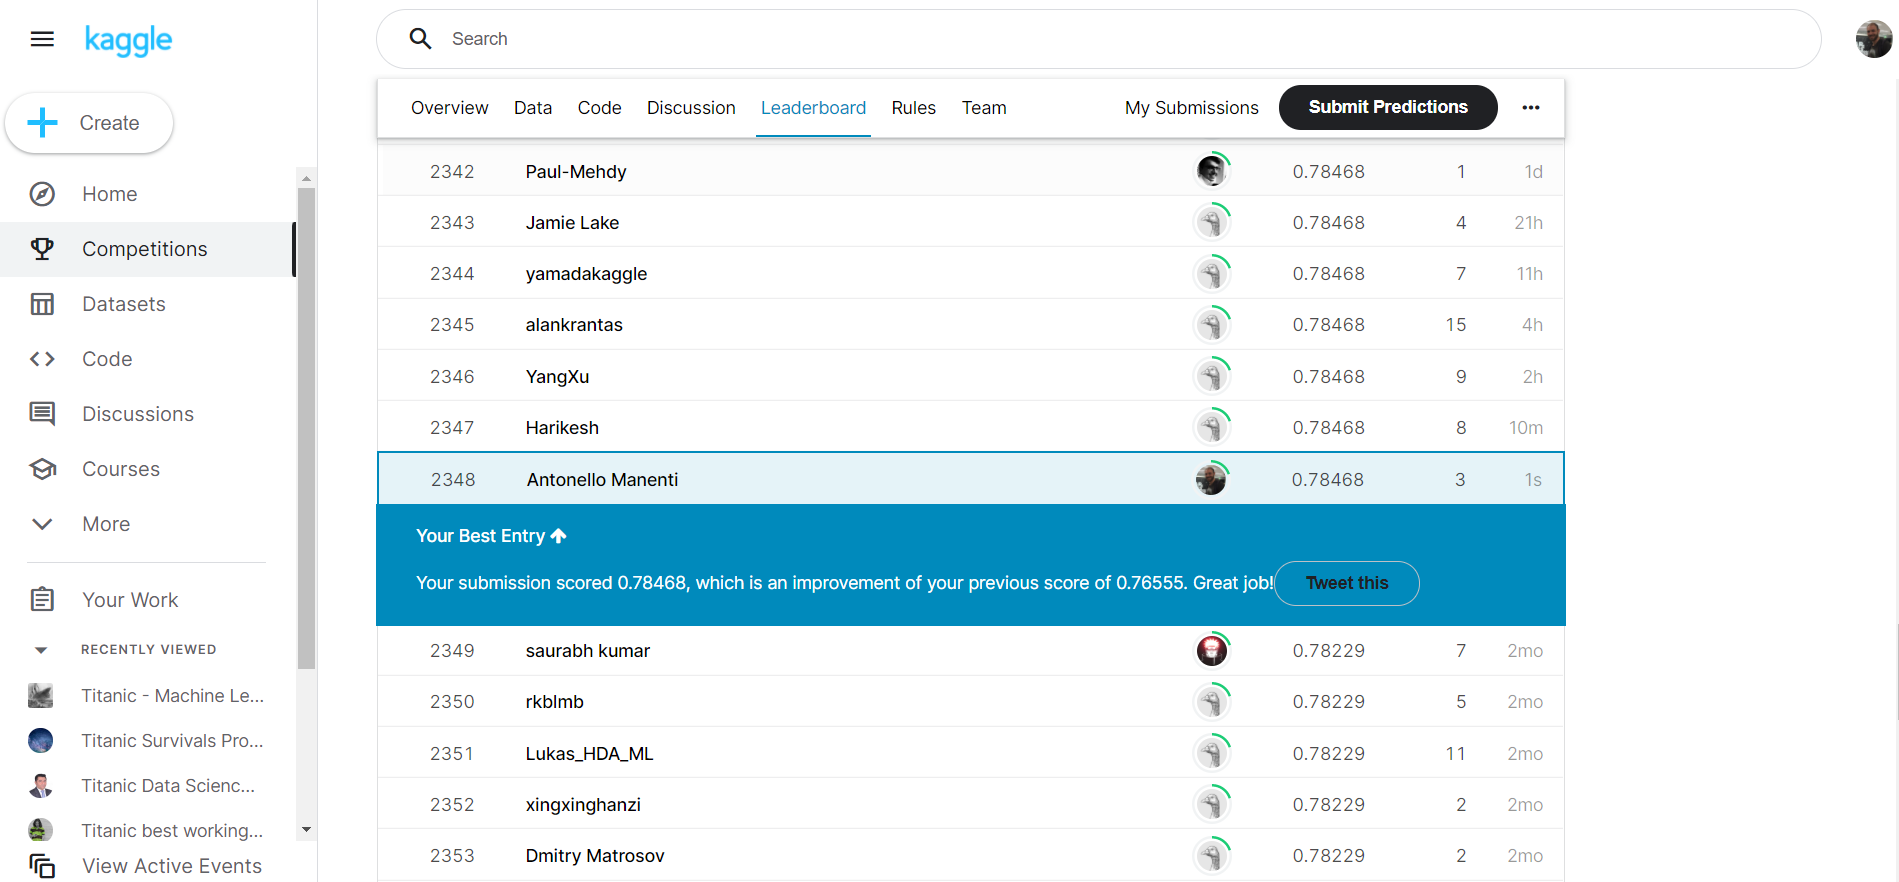

My accuracy is 0.78468. I ranked 2348th out of 13879th (06/01/2022).

Best 17% 💪

The default gender_submission's score is 0.76555!